In [15]:
#For data manipulation
import numpy as np
import pandas as pd
import json
import math

#For data visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib.font_manager
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from matplotlib.pylab import rcParams

#For data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#For clustering analysis
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#For evaluating clusters
from sklearn.metrics import calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, ward

#Suppress warnings from showing
import warnings
warnings.filterwarnings('ignore')

#Allow ourselves to save things
import pickle

Import dataframe with all the variables

In [16]:
df = pd.read_csv('data_with_targets.csv')

Define functions for choropleth maps

In [17]:
#Define colours for the visuals
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

CB91_BlueD = '#016794'
CB91_GreenD = '#187970'
CB91_PinkD = '#B317B1'
CB91_PurpleD = '#4E1762'
CB91_VioletD = '#330E4C'
CB91_AmberD = '#985E09'

CB91_BlueL = '#ABE5FF'
CB91_GreenL = '#B5F1EB'
CB91_PinkL = '#FAD9FA'
CB91_PurpleL = '#D9A8EB'
CB91_VioletL = '#ECD4F5'
CB91_AmberL = '#F9D094'


#The following gradients will be used for heatmaps, etc
CB91_Grad_BP = ['#2CBDFE', '#2fb9fc', '#33b4fa', '#36b0f8',
                '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',
                '#489bee', '#4b97ec', '#4f92ea', '#528ee8',
                '#568ae6', '#5986e4', '#5c81e2', '#607de0',
                '#6379de', '#6775dc', '#6a70da', '#6e6cd8',
                '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']

CB91_Grad_BA = ['#2cbdfe', '#31bdf9', '#36bcf5', '#3bbcf0',
                '#41bcec', '#46bbe7', '#4bbbe3', '#50bbde',
                '#55bbd9', '#5abad5', '#60bad0', '#65bacc',
                '#6ab9c7', '#6fb9c3', '#74b9be', '#79b8ba',
                '#7eb8b5', '#84b8b0', '#89b7ac', '#8eb7a7',
                '#93b7a3', '#98b79e', '#9db69a', '#a3b695',
                '#a8b690', '#adb58c', '#b2b587', '#b7b583',
                '#bcb47e', '#c1b47a', '#c7b475', '#ccb371',
                '#d1b36c', '#d6b367', '#dbb363', '#e0b25e',
                '#e6b25a', '#ebb255', '#f0b151', '#f5b14c']

CB91_Grad_AP = ['#f5b14c', '#f3ae4f', '#f0aa52', '#eea755',
                '#eca458', '#eaa05c', '#e79d5f', '#e59962',
                '#e39665', '#e19368', '#de8f6b', '#dc8c6e',
                '#da8971', '#d88574', '#d58277', '#d37f7b',
                '#d17b7e', '#cf7881', '#cc7584', '#ca7187',
                '#c86e8a', '#c66a8d', '#c36790', '#c16493',
                '#bf6096', '#bd5d9a', '#ba5a9d', '#b856a0',
                '#b653a3', '#b450a6', '#b14ca9', '#af49ac',
                '#ad46af', '#ab42b2', '#a83fb5', '#a63bb9',
                '#a438bc', '#a235bf', '#9f31c2', '#9d2ec5']

CB91_Grad_GP = ['#47dbcd', '#4bd9ce', '#50d8cf', '#54d6d0',
                '#59d5d1', '#5dd3d2', '#61d2d3', '#66d0d4',
                '#6acfd5', '#6fcdd6', '#73ccd6', '#78cad7',
                '#7cc9d8', '#80c7d9', '#85c6da', '#89c4db',
                '#8ec3dc', '#92c1dd', '#96c0de', '#9bbedf',
                '#9fbde0', '#a4bbe1', '#a8bae2', '#acb8e3',
                '#b1b7e4', '#b5b5e5', '#bab4e6', '#beb2e7',
                '#c2b1e8', '#c7afe9', '#cbaee9', '#d0acea',
                '#d4abeb', '#d9a9ec', '#dda8ed', '#e1a6ee',
                '#e6a5ef', '#eaa3f0', '#efa2f1', '#f3a0f2']

CB91_Grad_GWP= ['#47dbcd','#4fdcce','#56ddd0','#5dded1',
                '#64dfd2','#6ae0d3','#70e1d5','#75e2d6',
                '#7be3d7','#80e4d8','#85e5da','#8ae6db',
                '#8fe7dc','#94e8dd','#98e9df','#9deae0',
                '#a1ebe1','#a6ece2','#aaede4','#afede5',
                '#b3eee6','#b7efe8','#bbf0e9','#c0f1ea',
                '#c4f2eb','#c8f3ed','#ccf4ee','#d0f5ef',
                '#d4f6f1','#d8f6f2','#dcf7f3','#e0f8f5',
                '#e4f9f6','#e8faf7','#ecfbf8','#f0fcfa',
                '#f3fcfb','#f7fdfc','#fbfefe','#ffffff',
                '#fdfafe','#fbf5fc','#f9f0fb','#f7eaf9',
                '#f4e5f8','#f2e0f7','#f0dbf5','#eed6f4',
                '#ecd1f2','#e9ccf1','#e7c7f0','#e5c1ee',
                '#e2bced','#e0b7eb','#deb2ea','#dbade8',
                '#d9a8e7','#d6a3e5','#d49ee4','#d199e2',
                '#cf94e1','#cc8fdf','#ca89de','#c784dc',
                '#c57fdb','#c27ad9','#bf75d8','#bd6fd6',
                '#ba6ad5','#b765d3','#b45fd2','#b25ad0',
                '#af54cf','#ac4ecd','#a949cb','#a642ca',
                '#a33cc8','#a035c7','#9d2ec5']

CB91_Grad_BWP= ['#2cbdfe','#31bffe','#37c0fe','#3cc2fe',
                '#42c4fe','#47c5fe','#4cc7fe','#52c9fe',
                '#57cbfe','#5dccfe','#62cefe','#68d0fe',
                '#6dd1fe','#72d3fe','#78d5fe','#7dd6fe',
                '#83d8fe','#88dafe','#8ddbfe','#93ddfe',
                '#98dfff','#9ee1ff','#a3e2ff','#a8e4ff',
                '#aee6ff','#b3e7ff','#b9e9ff','#beebff',
                '#c3ecff','#c9eeff','#cef0ff','#d4f1ff',
                '#d9f3ff','#dff5ff','#e4f7ff','#e9f8ff',
                '#effaff','#f4fcff','#fafdff','#ffffff',
                '#fdfafe','#fbf5fc','#f9f0fb','#f7eaf9',
                '#f4e5f8','#f2e0f7','#f0dbf5','#eed6f4',
                '#ecd1f2','#e9ccf1','#e7c7f0','#e5c1ee',
                '#e2bced','#e0b7eb','#deb2ea','#dbade8',
                '#d9a8e7','#d6a3e5','#d49ee4','#d199e2',
                '#cf94e1','#cc8fdf','#ca89de','#c784dc',
                '#c57fdb','#c27ad9','#bf75d8','#bd6fd6',
                '#ba6ad5','#b765d3','#b45fd2','#b25ad0',
                '#af54cf','#ac4ecd','#a949cb','#a642ca',
                '#a33cc8','#a035c7','#9d2ec5']

#Add party colors
con_blue = '#0A3B7C'
lab_red = '#E4003B'
lib_yel = '#FAA61A'
snp_yel = '#FFF481'
green_green = '#52DF00'
brex_blue = '#00E2ED'
ukip_pur = '#470A65'
plaid_green = '#006A56'

con_lab = '#992281'
con_lib = '#837859'
con_snp = '#85987f'
lab_lib = '#ef532b'
lab_snp = '#f27a5e'
lib_snp = '#fccf4d'


#A list that we'll use to cycle through colors in charts
color_list = [CB91_Blue, CB91_Green, CB91_Amber, CB91_Pink,
              CB91_Violet, CB91_BlueD, CB91_GreenD, CB91_Purple,
              CB91_AmberL, CB91_BlueL, CB91_GreenL, CB91_AmberD, 
              CB91_VioletD, CB91_PinkL, CB91_VioletL, CB91_PinkD]


#Use seaborn to set all the default chart visual settings
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":16})

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [18]:
def gradient_mapper(kpi, grad, outliers=None, stretch=1, factor=1):
    
    '''
    Takes a list/series of numbers, outputs a list of hex colours,
    appropriate for heatmapping the initial data.
    
    Parameters:
    - col (list/series, etc.): The data to be transformed
    - grad (list hex codes): A list of colors that the data will be transformed to
    - outliers (top,bottom,both): Stretches the outliers, resulting in more gradient
                                  change amongst clustered values
    - stretch (int): The number of colors to duplicate if outliers variable used
    - factor (int): The scale of color duplication if outliers variable used
    
    '''
    #Work out how many colours we have in the given gradient
    colors = len(grad)
    half = colors // 2
    
    #Ensure that stretch is possible
    stretch = min(half//3, stretch)
    
    factors = [4*factor, 3*factor, 2*factor]
    
    if outliers != None:
        #Stretch gradient if required. Declare three lists:
        #Start is the stretch map for the bottom end
        if (outliers.lower() == 'bottom') or (outliers.lower() == 'both'):
            start = [factors[0]]*stretch + [factors[1]]*stretch + [factors[2]]*stretch
        else:
            start = []

        #End is the stretch map for the top end
        if (outliers.lower() == 'top') or (outliers.lower() == 'both'):
            end = [factors[2]]*stretch + [factors[1]]*stretch + [factors[0]]*stretch
        else:
            end = []

        #Middle is a list of 1s which will be non-transformed
        middle = [1 for i in range(colors - len(start) - len(end))]

        stretch_map = start + middle + end
        
    else:
        stretch_map = [1 for i in range(colors)]
        
    #Create tuples of the gradients, and the number of
    #times they should be repeated in the list
    zip_list = list(zip(grad,stretch_map))
    
    #Use this to create a list of lists
    #Each element will be a list of the same gradient
    #repeated the required number of times
    list_of_lists = [[i[0]]*i[1] for i in zip_list]
    
    #Melt this list of lists into a single list
    grad = sum(list_of_lists, [])
    
    #Re-define colors variable
    colors = len(grad)-1
    
    #Define the lowest and the highest points in the dataset
    kpi_min = kpi.min()
    kpi_max = kpi.max()
    
    #Transform the data to integers between zero and the length of the gradient list
    first_map = list(map(lambda x: int(round(colors*(x-kpi_min) /
                                             (kpi_max-kpi_min),0)), list(kpi)))
    
    #Map the integers onto the gradient list
    second_map = list(map(lambda x: grad[x], first_map))
    
    #Return this, as well as the new gradient
    return second_map, grad




f = open('constituencieshex.json')
datamap = json.load(f)
datamap = pd.DataFrame(datamap['hexes']).T
datamap = datamap[['n','q','r']]
datamap.columns=['Name','X','Y']

def kpi_map(kpi, width=6, colorbar=True,
            outliers=None, stretch=1, factor=1,
            exclude=[], title=None,
            colors=None, exc_color='#999999',
            grad=CB91_Grad_AP, data=df):
    
    '''
    Outputs a choropleth map, showing each constituency in the same size.
    
    Parameters:
    - kpi (list/series, etc.): The data to be transformed
    - width (float): The desired width of the figure
    - df (dataframe): The dataframe to get the data from
    - grad (list hex codes): A list of colors that the data will be transformed to
    - outliers (top,bottom,both): Stretches the outliers, resulting in more gradient
                                  change amongst clustered values
    - stretch (int): The number of colors to duplicate if outliers variable used
    - factor (int): The scale of color duplication if outliers variable used
    - exclude (list): A list of regions to exclude from the chart
    - colors (dataframe): A dataframe of hex-codes (index should be constituency codes)
    - title (string): The desired title of the chart
    
    '''    
    
    #Filter out different regions, depending on paramaters
    df_filtered = pd.concat([datamap, data[['Region',kpi]]], axis=1)
    
    #If we have colors to add, concatonate these in
    if isinstance(colors, pd.DataFrame):
        df_filtered = pd.concat([df_filtered, colors], axis=1)
        df_filtered.columns = ['Name', 'X', 'Y', 'Region', kpi, 'Colors']
    
    df_filtered = df_filtered.loc[~df_filtered['Region'].isin(exclude)]
    kpi_filtered = df_filtered[kpi]
    
    if isinstance(colors, pd.DataFrame) is False:
        #Use the gradient mapper function to return the colors for the plot
        gradient_map = gradient_mapper(kpi=kpi_filtered,
                                    grad=grad,
                                    outliers=outliers,
                                    stretch=stretch,
                                    factor=factor)
        colors_map = gradient_map[0]
    
    else:
        #Fill in nan colors with white
        df_filtered['Colors'].fillna(exc_color, inplace=True)
        
        #Return the column to be used as the colours list in the plot
        colors_map = list(df_filtered['Colors'])
    
    #Work out the aspect ratio of the filtered constituencies
    X_diff = np.max(df_filtered['X'])-np.min(df_filtered['X'])
    Y_diff = np.max(df_filtered['Y'])-np.min(df_filtered['Y'])
    
    #Declare the width and height of the plot
    height = width * (Y_diff/X_diff)
    size = 500*math.pi*((width/X_diff)**2)
    
    #Create the figure
    fig, ax = plt.subplots(figsize=(width,height))
    
    plt.xticks([])
    plt.yticks([])

    #Plot the scatter
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(df_filtered['X'],
                df_filtered['Y'],
                s=size,
                marker='s',
                c=colors_map)
    
    #Remove axes
    sns.despine(left=True, bottom=True)
    ax1.set_title(title);
    
    #plot the colorbar
    if (colorbar == True) and isinstance(colors, pd.DataFrame) is False:        
        cmap = LinearSegmentedColormap.from_list(name= '',
                                                 colors=gradient_map[1])
        ax2 = fig.add_subplot(2,30,28)
        norm = mpl.colors_map.Normalize(vmin=df_filtered[kpi].min(),
                                    vmax=df_filtered[kpi].max())
        cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                       norm=norm, orientation='vertical')
    
        # remove the x and y ticks
        for ax in [ax1,ax2]:
            ax.set_xticks([])
            ax.set_yticks([])
    
    else:
        ax1.set_xticks([])
        ax1.set_yticks([])

Data feature selection

In [19]:
df.head()

,ID,Constituency,Region,Type,Population,0-9,10-19,20-29,30-39,40-49,...,Depression,Obesity,Diabetes,Asthma,DiseasesPerPop,%LeaveVote,%17Turnout,Winner_17,seat_types_17,seat_types_yg
0,E14000554,Berwick-upon-Tweed,North East,Rural,75425,0.0863,0.0863,0.0902,0.1002,0.1102,...,0.08551,0.13193,0.08029,0.07315,0.89389,0.553,0.719149,Con,con safe,con safe
1,E14000569,Bishop Auckland,North East,Rural,89415,0.1063,0.1086,0.1103,0.1090,0.1206,...,0.12388,0.14646,0.08225,0.06856,0.89166,0.609,0.640827,Lab,con lab marginal,con lab marginal
2,E14000574,Blaydon,North East,Small Town,87978,0.1053,0.1050,0.0984,0.1225,0.1284,...,0.09790,0.12590,0.07011,0.06651,0.82772,0.561,0.703311,Lab,lab safe,lab safe
3,E14000575,Blyth Valley,North East,Small Town,84340,0.1106,0.1092,0.1087,0.1222,0.1256,...,0.12216,0.13512,0.08322,0.07157,0.88176,0.605,0.671135,Lab,lab safe,con lab marginal
4,E14000641,City of Durham,North East,Small Town,102534,0.0917,0.1195,0.2110,0.1145,0.1068,...,0.09814,0.08893,0.05807,0.05606,0.65024,0.433,0.680566,Lab,lab safe,con lab marginal


In [20]:
df.set_index('ID', inplace=True)

In [21]:
df.columns

Index(['Constituency', 'Region', 'Type', 'Population', '0-9', '10-19', '20-29',
       '30-39', '40-49', '50-59',
       ...
       'Depression', 'Obesity', 'Diabetes', 'Asthma', 'DiseasesPerPop',
       '%LeaveVote', '%17Turnout', 'Winner_17', 'seat_types_17',
       'seat_types_yg'],
      dtype='object', length=101)

In [22]:
# We first remove the Northern Ireland Region and Chorley seat since these will cause outliers

In [23]:
df = df.loc[(df['Region'] != 'Northern Ireland')
           &(df['Constituency'] != 'Chorley')]

Next we want to perform clustering without the region influencing any of the politically clustered regions and hence we will drop that column but we will copy the dataframe first to use it for later analysis. Moreover, we will drop the ID, type of area column due to our clustering being based on non geographical factors

In [24]:
data = df.copy()

In [25]:
df.iloc[:, 4:].head()

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,AreaKM2,...,Depression,Obesity,Diabetes,Asthma,DiseasesPerPop,%LeaveVote,%17Turnout,Winner_17,seat_types_17,seat_types_yg
ID,,,,,,,,,,,,,,,,,,,,,
E14000554,0.0863,0.0863,0.0902,0.1002,0.1102,0.1657,0.1629,0.1257,0.0670,2379.418011,...,0.08551,0.13193,0.08029,0.07315,0.89389,0.553,0.719149,Con,con safe,con safe
E14000569,0.1063,0.1086,0.1103,0.1090,0.1206,0.1533,0.1357,0.1008,0.0554,922.670335,...,0.12388,0.14646,0.08225,0.06856,0.89166,0.609,0.640827,Lab,con lab marginal,con lab marginal
E14000574,0.1053,0.1050,0.0984,0.1225,0.1284,0.1484,0.1246,0.1058,0.0616,110.329843,...,0.09790,0.12590,0.07011,0.06651,0.82772,0.561,0.703311,Lab,lab safe,lab safe
E14000575,0.1106,0.1092,0.1087,0.1222,0.1256,0.1430,0.1339,0.0990,0.0477,70.362520,...,0.12216,0.13512,0.08322,0.07157,0.88176,0.605,0.671135,Lab,lab safe,con lab marginal
E14000641,0.0917,0.1195,0.2110,0.1145,0.1068,0.1206,0.1068,0.0845,0.0446,186.642526,...,0.09814,0.08893,0.05807,0.05606,0.65024,0.433,0.680566,Lab,lab safe,con lab marginal


In [26]:
# Remove constituency, type, and region column 
df = df.iloc[:, 4:]

Looking at all the age columns, it is best to combine some of them say above 60 category as the more older a person gets, it maybe that he does not even vote or separating ages into such narrow categories does not seem to produce much benefit. So our proposed categories would be (0-19) (how many kids/teenagers a household has, going uni etc), (20-29) would involve uni, marriage, work life etc, (30-59) would include mainly parents, adulthood, maturity, richer category compared to other categories, 60-80+ would represent old age categories.

In [27]:
# df['0-19%'] = df.iloc[:, 1] + df.iloc[:, 2]
df['0-9'] = df.iloc[:, 1] + df.iloc[:, 2]
df.rename(columns={'0-9': '0-19%'})

,0-19%,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,AreaKM2,...,Depression,Obesity,Diabetes,Asthma,DiseasesPerPop,%LeaveVote,%17Turnout,Winner_17,seat_types_17,seat_types_yg
ID,,,,,,,,,,,,,,,,,,,,,
E14000554,0.1765,0.0863,0.0902,0.1002,0.1102,0.1657,0.1629,0.1257,0.0670,2379.418011,...,0.08551,0.13193,0.08029,0.07315,0.89389,0.553,0.719149,Con,con safe,con safe
E14000569,0.2189,0.1086,0.1103,0.1090,0.1206,0.1533,0.1357,0.1008,0.0554,922.670335,...,0.12388,0.14646,0.08225,0.06856,0.89166,0.609,0.640827,Lab,con lab marginal,con lab marginal
E14000574,0.2034,0.1050,0.0984,0.1225,0.1284,0.1484,0.1246,0.1058,0.0616,110.329843,...,0.09790,0.12590,0.07011,0.06651,0.82772,0.561,0.703311,Lab,lab safe,lab safe
E14000575,0.2179,0.1092,0.1087,0.1222,0.1256,0.1430,0.1339,0.0990,0.0477,70.362520,...,0.12216,0.13512,0.08322,0.07157,0.88176,0.605,0.671135,Lab,lab safe,con lab marginal
E14000641,0.3305,0.1195,0.2110,0.1145,0.1068,0.1206,0.1068,0.0845,0.0446,186.642526,...,0.09814,0.08893,0.05807,0.05606,0.65024,0.433,0.680566,Lab,lab safe,con lab marginal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W07000076,0.2340,0.1145,0.1195,0.1314,0.1269,0.1375,0.1151,0.0880,0.0442,114.529516,...,NaN,NaN,NaN,NaN,NaN,0.551,0.642736,Lab,lab safe,lab safe
W07000077,0.2364,0.1148,0.1216,0.1253,0.1289,0.1388,0.1185,0.0925,0.0477,112.003274,...,NaN,NaN,NaN,NaN,NaN,0.589,0.642971,Lab,lab safe,lab safe
W07000078,0.2255,0.1136,0.1119,0.1203,0.1268,0.1418,0.1219,0.0968,0.0498,315.170195,...,NaN,NaN,NaN,NaN,NaN,0.526,0.727173,Con,con lab marginal,con lab marginal


In [28]:
df.drop(columns=['10-19'], inplace=True)

In [29]:
df.rename(columns={'0-9': '0-19%'}, inplace=True)

In [30]:
df['30-39'] = df['30-39'] + df['40-49'] + df['50-59']
df.rename(columns={'30-39': '30-59%'}, inplace=True)
df.rename(columns={'20-29': '20-29%'}, inplace=True)
df.head()

,0-19%,20-29%,30-59%,40-49,50-59,60-69,70-79,80+,AreaKM2,Pop_Density,...,Depression,Obesity,Diabetes,Asthma,DiseasesPerPop,%LeaveVote,%17Turnout,Winner_17,seat_types_17,seat_types_yg
ID,,,,,,,,,,,,,,,,,,,,,
E14000554,0.1765,0.0902,0.3761,0.1102,0.1657,0.1629,0.1257,0.0670,2379.418011,31.698928,...,0.08551,0.13193,0.08029,0.07315,0.89389,0.553,0.719149,Con,con safe,con safe
E14000569,0.2189,0.1103,0.3829,0.1206,0.1533,0.1357,0.1008,0.0554,922.670335,96.908935,...,0.12388,0.14646,0.08225,0.06856,0.89166,0.609,0.640827,Lab,con lab marginal,con lab marginal
E14000574,0.2034,0.0984,0.3993,0.1284,0.1484,0.1246,0.1058,0.0616,110.329843,797.408914,...,0.09790,0.12590,0.07011,0.06651,0.82772,0.561,0.703311,Lab,lab safe,lab safe
E14000575,0.2179,0.1087,0.3908,0.1256,0.1430,0.1339,0.0990,0.0477,70.362520,1198.649502,...,0.12216,0.13512,0.08322,0.07157,0.88176,0.605,0.671135,Lab,lab safe,con lab marginal
E14000641,0.3305,0.2110,0.3419,0.1068,0.1206,0.1068,0.0845,0.0446,186.642526,549.360332,...,0.09814,0.08893,0.05807,0.05606,0.65024,0.433,0.680566,Lab,lab safe,con lab marginal


In [31]:
df.drop(columns=['40-49', '50-59'], inplace=True)
df['60-69'] = df['60-69'] + df['70-79'] + df['80+']
df.rename(columns={'60-69': '60+%'}, inplace=True)
df.drop(columns=['70-79', '80+'], inplace=True)
df.head()

,0-19%,20-29%,30-59%,60+%,AreaKM2,Pop_Density,Businesses,%BusinessGrowth,BusinessesPer1kCap,%Unemployment,...,Depression,Obesity,Diabetes,Asthma,DiseasesPerPop,%LeaveVote,%17Turnout,Winner_17,seat_types_17,seat_types_yg
ID,,,,,,,,,,,,,,,,,,,,,
E14000554,0.1765,0.0902,0.3761,0.3556,2379.418011,31.698928,3500,0.136364,46.403712,0.028975,...,0.08551,0.13193,0.08029,0.07315,0.89389,0.553,0.719149,Con,con safe,con safe
E14000569,0.2189,0.1103,0.3829,0.2919,922.670335,96.908935,3200,0.128748,35.788179,0.057016,...,0.12388,0.14646,0.08225,0.06856,0.89166,0.609,0.640827,Lab,con lab marginal,con lab marginal
E14000574,0.2034,0.0984,0.3993,0.2920,110.329843,797.408914,2305,0.194301,26.199732,0.042835,...,0.09790,0.12590,0.07011,0.06651,0.82772,0.561,0.703311,Lab,lab safe,lab safe
E14000575,0.2179,0.1087,0.3908,0.2806,70.362520,1198.649502,1840,0.222591,21.816457,0.057092,...,0.12216,0.13512,0.08322,0.07157,0.88176,0.605,0.671135,Lab,lab safe,con lab marginal
E14000641,0.3305,0.2110,0.3419,0.2359,186.642526,549.360332,2450,0.266150,23.894513,0.032860,...,0.09814,0.08893,0.05807,0.05606,0.65024,0.433,0.680566,Lab,lab safe,con lab marginal


Now for selecting born region, religion, and ethnicity

We will restrict born regions to 'Born UK', 'Born Asia', 'Born Other Europe', 'Born Rest of the World' which can signficantly better focus target campaigns of different political parties as to target even more than 3 ethnicities does require lot of effort. 

With regards to religion, we can use the top 3-4 categories of religion according to wikipedia which would be Christianity, Islam, No religion or atheism and Hinduisim. There are 7 categories in the current dataframe and targeting all these religions specifically would not be very effective. We will restrict to 4 categories specifically: Islam, Christianity, No religion and other religion

Born UK and being Christian is highly correlated or being white and christian or being south asian and muslim. As our focus on predicting clusters rather than interpreting the parameters obtained, having such intercorrelation issues should not be an issue. 

Lastly, concerning race colour, I believe the 4 mentioned (White, Black, Asian, Mixed) are sufficient to be used for our clustering algorithms

### Country Of Birth

In [32]:
df['%BornSouthAsia'] = df['%BornSouthAsia'] + df['%BornSEAsia'] + df['%BornEastAsia']
df.rename(columns={'%BornSouthAsia': '%Born_Asia'}, inplace=True)
df.drop(columns=['%BornSEAsia', '%BornEastAsia'], inplace=True)

In [33]:
df[['%Born_Asia']]

,%Born_Asia
ID,
E14000554,0.005507
E14000569,0.004774
E14000574,0.006106
E14000575,0.005306
E14000641,0.021054
...,...
W07000076,0.006231
W07000077,0.004787
W07000078,0.009710


In [34]:
df[['%BornIreland', '%BornOtherEU', '%BornOtherEurope']].head(2)

,%BornIreland,%BornOtherEU,%BornOtherEurope
ID,,,
E14000554,0.002338,0.013722,0.000832
E14000569,0.001802,0.010626,0.000631


In [35]:
df['%BornIreland'] = df['%BornIreland'] + df['%BornOtherEU'] + df['%BornOtherEurope']
df.rename(columns={'%BornIreland': '%Born_Other_Europe'}, inplace=True)
df.drop(columns=['%BornOtherEU', '%BornOtherEurope'], inplace=True)

In [36]:
df[['%Born_Other_Europe']].head(2)

,%Born_Other_Europe
ID,
E14000554,0.016892
E14000569,0.013059


In [37]:
df[['%BornAfrica', '%BornME', '%BornNAmerica', '%BornLatinAmerica', '%BornAustralasia']]

,%BornAfrica,%BornME,%BornNAmerica,%BornLatinAmerica,%BornAustralasia
ID,,,,,
E14000554,0.003804,0.000911,0.002628,0.000555,0.001162
E14000569,0.002777,0.000562,0.001469,0.000310,0.000941
E14000574,0.003795,0.001518,0.001552,0.000317,0.000657
E14000575,0.002750,0.000681,0.001351,0.000341,0.000791
E14000641,0.007661,0.004048,0.006887,0.001102,0.002162
...,...,...,...,...,...
W07000076,0.003058,0.000862,0.001713,0.000437,0.000862
W07000077,0.001949,0.000385,0.001432,0.000292,0.000756
W07000078,0.005331,0.001525,0.004072,0.000870,0.001801


In [38]:
df['%BornAfrica'] = df['%BornAfrica'] + df['%BornME'] + df['%BornNAmerica'] + df['%BornLatinAmerica'] + df['%BornAustralasia']
df.rename(columns={'%BornAfrica': '%Born_RestOf_theWorld'}, inplace=True)
df.drop(columns=['%BornME', '%BornNAmerica', '%BornLatinAmerica', '%BornAustralasia'], inplace=True)
df[['%Born_RestOf_theWorld']].head(2)

,%Born_RestOf_theWorld
ID,
E14000554,0.009060
E14000569,0.006059


### Religion

In [39]:
df.shape # have reduced to 85 features

(631, 84)

In [40]:
df['%Sikh'] = df['%Sikh'] + df['%Hindu'] + df['%Buddhist'] + df['%Jewish']
df.rename(columns={'%Sikh': '%Other_Religion'}, inplace=True)
df.drop(columns=['%Hindu', '%Jewish', '%Buddhist'], inplace=True)
df[['%Other_Religion']].head(2)

,%Other_Religion
ID,
E14000554,0.004015
E14000569,0.003615


In [41]:
df.shape

(631, 81)

### Split the dataset - GB Dataset and England Only Dataset

In [42]:
df.loc[:,df.isna().sum() > 0].isna().sum()

LASpendGrowth15to19     99
%ChildcareGood          99
%FSM_GoodEarlyYears     99
%FSM_GoodPrimary        99
%FSM_GoodKS2            99
%FSM_GoodSecondary      99
%FSM_AttainmentScore    99
%FSM_Neet               99
%FSM_KS5Score           99
%FSM_2ALevels           99
%ProfessionalJobs       99
%JobsSubLivingWage      99
%FamiliesOwnHouse       99
PerPupilFunding         99
%13-19PerPupilGrowth    99
%5GoodGCSEs             99
Avg8Score               99
PupilProgress           99
%BadSchools             99
High Blood Pressure     99
Depression              99
Obesity                 99
Diabetes                99
Asthma                  99
DiseasesPerPop          99
dtype: int64

In [43]:
#Great Britain dataset will remove columns where we have NAs
df_gb = df.dropna(axis=1)

#England dataset will remove rows where we have NAs
df_eng = df.dropna(axis=0)

# When we drop all columns with NAs, we keep rows with constituencies being from Scotland and Wales 
# as these constituencies cause the NAs mainly. 
# When we drop all rows with NAs, automatically these constituencies are removed

In [44]:
df_gb.to_csv('data_gb.csv')
df_eng.to_csv('data_eng.csv')

### We will work only with the GB Dataset for this research project

In [45]:
df_gb = pd.read_csv('data_gb.csv', index_col='ID')

In [46]:
df_gb.head()

,0-19%,20-29%,30-59%,60+%,AreaKM2,Pop_Density,Businesses,%BusinessGrowth,BusinessesPer1kCap,%Unemployment,...,%Born_RestOf_theWorld,%Born_Asia,MbpsSpeed,%UnableDecent,%Under10Mbps,%LeaveVote,%17Turnout,Winner_17,seat_types_17,seat_types_yg
ID,,,,,,,,,,,,,,,,,,,,,
E14000554,0.1765,0.0902,0.3761,0.3556,2379.418011,31.698928,3500,0.136364,46.403712,0.028975,...,0.009060,0.005507,29.6,0.06252,0.2489,0.553,0.719149,Con,con safe,con safe
E14000569,0.2189,0.1103,0.3829,0.2919,922.670335,96.908935,3200,0.128748,35.788179,0.057016,...,0.006059,0.004774,29.0,0.04792,0.2432,0.609,0.640827,Lab,con lab marginal,con lab marginal
E14000574,0.2034,0.0984,0.3993,0.2920,110.329843,797.408914,2305,0.194301,26.199732,0.042835,...,0.007839,0.006106,41.9,0.02269,0.2393,0.561,0.703311,Lab,lab safe,lab safe
E14000575,0.2179,0.1087,0.3908,0.2806,70.362520,1198.649502,1840,0.222591,21.816457,0.057092,...,0.005914,0.005306,30.5,0.00114,0.2446,0.605,0.671135,Lab,lab safe,con lab marginal
E14000641,0.3305,0.2110,0.3419,0.2359,186.642526,549.360332,2450,0.266150,23.894513,0.032860,...,0.021860,0.021054,32.5,0.00630,0.2329,0.433,0.680566,Lab,lab safe,con lab marginal


In [47]:
df.columns

Index(['0-19%', '20-29%', '30-59%', '60+%', 'AreaKM2', 'Pop_Density',
       'Businesses', '%BusinessGrowth', 'BusinessesPer1kCap', '%Unemployment',
       'UnemploymentChange', '2019_Wage', 'HousePrice', '%HousePriceGrowth',
       'HousePricePerWage', '%OwnOutright', '%OwnWithMort', '%PrivateRent',
       '%SocialHousing', '%Heavy Industry & Manufacturing',
       '%Wholesale & Retail', '%Agriculture', '%Hospitality',
       '%Public Admin & Defence', '%Transport', '%Health & Social Work',
       '%Support & Admin', '%Education', '%Sciences', '%FS & ICT',
       '%Other Industry', '%NoQuals', '%Level1', '%Level2', '%Level3',
       '%Level4+', '%White', '%Mixed', '%Asian', '%Black', '%NoReligion',
       '%Christian', '%Muslim', '%Other_Religion', '%BornUK',
       '%Born_Other_Europe', '%Born_RestOf_theWorld', '%Born_Asia',
       'MbpsSpeed', '%UnableDecent', '%Under10Mbps', 'LASpendGrowth15to19',
       '%ChildcareGood', '%FSM_GoodEarlyYears', '%FSM_GoodPrimary',
       '%FSM_Good

In [107]:
df[['AreaKM2', 'Pop_Density','Businesses', 'BusinessesPer1kCap','2019_Wage', 'HousePrice', 
       'HousePricePerWage']]

,AreaKM2,Pop_Density,Businesses,BusinessesPer1kCap,2019_Wage,HousePrice,HousePricePerWage
ID,,,,,,,
E14000554,2379.418011,31.698928,3500,46.403712,520,176100.0,6.512574
E14000569,922.670335,96.908935,3200,35.788179,520,120000.0,4.437870
E14000574,110.329843,797.408914,2305,26.199732,530,140000.0,5.079826
E14000575,70.362520,1198.649502,1840,21.816457,520,135846.0,5.023891
E14000641,186.642526,549.360332,2450,23.894513,610,148000.0,4.665826
...,...,...,...,...,...,...,...
W07000076,114.529516,770.648502,2065,23.396252,540,140000.0,4.985755
W07000077,112.003274,684.033576,2550,33.283734,580,115000.0,3.812997
W07000078,315.170195,324.751520,3205,31.313506,560,195000.0,6.696429


In [106]:
df[['AreaKM2', 'Pop_Density','Businesses', 'BusinessesPer1kCap','2019_Wage', 'HousePrice', 
       'HousePricePerWage']].apply(np.log1p)

,AreaKM2,Pop_Density,Businesses,BusinessesPer1kCap,2019_Wage,HousePrice,HousePricePerWage
ID,,,,,,,
E14000554,7.775031,3.487342,8.160804,3.858701,6.255750,12.078813,2.016578
E14000569,6.828355,4.584038,8.071219,3.605177,6.255750,11.695255,1.693387
E14000574,4.712497,6.682621,7.743270,3.303207,6.274762,11.849405,1.804976
E14000575,4.267773,7.089785,7.518064,3.127482,6.255750,11.819285,1.795733
E14000641,5.234539,6.310573,7.804251,3.214647,6.415097,11.904974,1.734453
...,...,...,...,...,...,...,...
W07000076,4.749526,6.648529,7.633370,3.194430,6.293419,11.849405,1.789382
W07000077,4.727417,6.529468,7.844241,3.534671,6.364751,11.652696,1.571320
W07000078,5.756281,5.786135,8.072779,3.475485,6.329721,12.180760,2.040756


<AxesSubplot:>

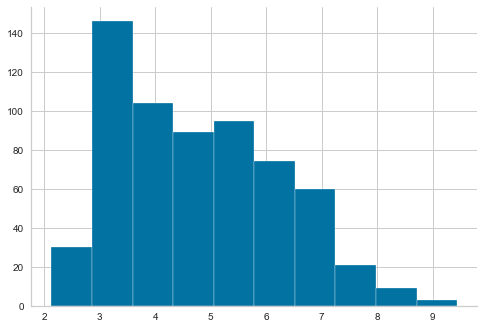

In [105]:
np.log1p(df.AreaKM2).hist()

<AxesSubplot:>

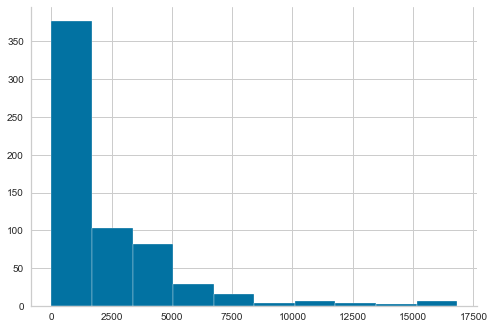

In [102]:
df.Pop_Density.hist()

In [115]:
df_gb_log_columns = df_gb.copy()
df_gb_log_columns[['AreaKM2', 'Pop_Density','Businesses', 'BusinessesPer1kCap','2019_Wage', 'HousePrice', 
       'HousePricePerWage']].apply(np.log1p, inplace=True)

,AreaKM2,Pop_Density,Businesses,BusinessesPer1kCap,2019_Wage,HousePrice,HousePricePerWage
ID,,,,,,,
E14000554,7.775031,3.487342,8.160804,3.858701,6.255750,12.078813,2.016578
E14000569,6.828355,4.584038,8.071219,3.605177,6.255750,11.695255,1.693387
E14000574,4.712497,6.682621,7.743270,3.303207,6.274762,11.849405,1.804976
E14000575,4.267773,7.089785,7.518064,3.127482,6.255750,11.819285,1.795733
E14000641,5.234539,6.310573,7.804251,3.214647,6.415097,11.904974,1.734453
...,...,...,...,...,...,...,...
W07000076,4.749526,6.648529,7.633370,3.194430,6.293419,11.849405,1.789382
W07000077,4.727417,6.529468,7.844241,3.534671,6.364751,11.652696,1.571320
W07000078,5.756281,5.786135,8.072779,3.475485,6.329721,12.180760,2.040756


### Separate target variables

In [133]:
df_gb_log_columns.iloc[:,:-1].drop(columns=['Winner_17'])

,0-19%,20-29%,30-59%,60+%,AreaKM2,Pop_Density,Businesses,%BusinessGrowth,BusinessesPer1kCap,%Unemployment,...,%BornUK,%Born_Other_Europe,%Born_RestOf_theWorld,%Born_Asia,MbpsSpeed,%UnableDecent,%Under10Mbps,%LeaveVote,%17Turnout,seat_types_17
ID,,,,,,,,,,,,,,,,,,,,,
E14000554,0.1765,0.0902,0.3761,0.3556,2379.418011,31.698928,3500,0.136364,46.403712,0.028975,...,0.968528,0.016892,0.009060,0.005507,29.6,0.06252,0.2489,0.553,0.719149,con safe
E14000569,0.2189,0.1103,0.3829,0.2919,922.670335,96.908935,3200,0.128748,35.788179,0.057016,...,0.976108,0.013059,0.006059,0.004774,29.0,0.04792,0.2432,0.609,0.640827,con lab marginal
E14000574,0.2034,0.0984,0.3993,0.2920,110.329843,797.408914,2305,0.194301,26.199732,0.042835,...,0.974581,0.011475,0.007839,0.006106,41.9,0.02269,0.2393,0.561,0.703311,lab safe
E14000575,0.2179,0.1087,0.3908,0.2806,70.362520,1198.649502,1840,0.222591,21.816457,0.057092,...,0.976805,0.011975,0.005914,0.005306,30.5,0.00114,0.2446,0.605,0.671135,lab safe
E14000641,0.3305,0.2110,0.3419,0.2359,186.642526,549.360332,2450,0.266150,23.894513,0.032860,...,0.930628,0.026458,0.021860,0.021054,32.5,0.00630,0.2329,0.433,0.680566,lab safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W07000076,0.2340,0.1195,0.3958,0.2473,114.529516,770.648502,2065,0.286604,23.396252,0.042270,...,0.972890,0.013946,0.006933,0.006231,31.8,0.00352,0.2351,0.551,0.642736,lab safe
W07000077,0.2364,0.1216,0.3930,0.2587,112.003274,684.033576,2550,0.841155,33.283734,0.038407,...,0.979671,0.010728,0.004814,0.004787,29.2,0.00344,0.2564,0.589,0.642971,lab safe
W07000078,0.2255,0.1119,0.3889,0.2685,315.170195,324.751520,3205,0.209434,31.313506,0.034980,...,0.956207,0.020484,0.013598,0.009710,47.7,0.01863,0.2050,0.526,0.727173,con lab marginal


In [117]:
df_gb.iloc[:,:-3]

,0-19%,20-29%,30-59%,60+%,AreaKM2,Pop_Density,Businesses,%BusinessGrowth,BusinessesPer1kCap,%Unemployment,...,%Other_Religion,%BornUK,%Born_Other_Europe,%Born_RestOf_theWorld,%Born_Asia,MbpsSpeed,%UnableDecent,%Under10Mbps,%LeaveVote,%17Turnout
ID,,,,,,,,,,,,,,,,,,,,,
E14000554,0.1765,0.0902,0.3761,0.3556,2379.418011,31.698928,3500,0.136364,46.403712,0.028975,...,0.004015,0.968528,0.016892,0.009060,0.005507,29.6,0.06252,0.2489,0.553,0.719149
E14000569,0.2189,0.1103,0.3829,0.2919,922.670335,96.908935,3200,0.128748,35.788179,0.057016,...,0.003615,0.976108,0.013059,0.006059,0.004774,29.0,0.04792,0.2432,0.609,0.640827
E14000574,0.2034,0.0984,0.3993,0.2920,110.329843,797.408914,2305,0.194301,26.199732,0.042835,...,0.005482,0.974581,0.011475,0.007839,0.006106,41.9,0.02269,0.2393,0.561,0.703311
E14000575,0.2179,0.1087,0.3908,0.2806,70.362520,1198.649502,1840,0.222591,21.816457,0.057092,...,0.003395,0.976805,0.011975,0.005914,0.005306,30.5,0.00114,0.2446,0.605,0.671135
E14000641,0.3305,0.2110,0.3419,0.2359,186.642526,549.360332,2450,0.266150,23.894513,0.032860,...,0.010416,0.930628,0.026458,0.021860,0.021054,32.5,0.00630,0.2329,0.433,0.680566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W07000076,0.2340,0.1195,0.3958,0.2473,114.529516,770.648502,2065,0.286604,23.396252,0.042270,...,0.004242,0.972890,0.013946,0.006933,0.006231,31.8,0.00352,0.2351,0.551,0.642736
W07000077,0.2364,0.1216,0.3930,0.2587,112.003274,684.033576,2550,0.841155,33.283734,0.038407,...,0.003315,0.979671,0.010728,0.004814,0.004787,29.2,0.00344,0.2564,0.589,0.642971
W07000078,0.2255,0.1119,0.3889,0.2685,315.170195,324.751520,3205,0.209434,31.313506,0.034980,...,0.004789,0.956207,0.020484,0.013598,0.009710,47.7,0.01863,0.2050,0.526,0.727173


In [50]:
# GB Dataset
X_gb = df_gb.iloc[:,:-3]
y17_gb = df_gb['Winner_17']
y17_st_gb = df_gb['seat_types_17']
y19_st_gb = df_gb['seat_types_yg'] # You Gov

# England Dataset
X_eng = df_eng.iloc[:,:-3]
y17_eng = df_eng['Winner_17']
y17_st_eng = df_eng['seat_types_17']
y19_st_eng = df_eng['seat_types_yg']

In [134]:
# GB Dataset log columns
X_gb_log = df_gb_log_columns.iloc[:,:-1].drop(columns=['Winner_17'])

In [51]:
X_gb.columns

Index(['0-19%', '20-29%', '30-59%', '60+%', 'AreaKM2', 'Pop_Density',
       'Businesses', '%BusinessGrowth', 'BusinessesPer1kCap', '%Unemployment',
       'UnemploymentChange', '2019_Wage', 'HousePrice', '%HousePriceGrowth',
       'HousePricePerWage', '%OwnOutright', '%OwnWithMort', '%PrivateRent',
       '%SocialHousing', '%Heavy Industry & Manufacturing',
       '%Wholesale & Retail', '%Agriculture', '%Hospitality',
       '%Public Admin & Defence', '%Transport', '%Health & Social Work',
       '%Support & Admin', '%Education', '%Sciences', '%FS & ICT',
       '%Other Industry', '%NoQuals', '%Level1', '%Level2', '%Level3',
       '%Level4+', '%White', '%Mixed', '%Asian', '%Black', '%NoReligion',
       '%Christian', '%Muslim', '%Other_Religion', '%BornUK',
       '%Born_Other_Europe', '%Born_RestOf_theWorld', '%Born_Asia',
       'MbpsSpeed', '%UnableDecent', '%Under10Mbps', '%LeaveVote',
       '%17Turnout'],
      dtype='object')

## Cluster Analysis

### Scaling

In [52]:
scaler = StandardScaler()
X_gb_scaled = scaler.fit_transform(X_gb)

In [136]:
X_gb_log

,0-19%,20-29%,30-59%,60+%,AreaKM2,Pop_Density,Businesses,%BusinessGrowth,BusinessesPer1kCap,%Unemployment,...,%BornUK,%Born_Other_Europe,%Born_RestOf_theWorld,%Born_Asia,MbpsSpeed,%UnableDecent,%Under10Mbps,%LeaveVote,%17Turnout,seat_types_17
ID,,,,,,,,,,,,,,,,,,,,,
E14000554,0.1765,0.0902,0.3761,0.3556,2379.418011,31.698928,3500,0.136364,46.403712,0.028975,...,0.968528,0.016892,0.009060,0.005507,29.6,0.06252,0.2489,0.553,0.719149,con safe
E14000569,0.2189,0.1103,0.3829,0.2919,922.670335,96.908935,3200,0.128748,35.788179,0.057016,...,0.976108,0.013059,0.006059,0.004774,29.0,0.04792,0.2432,0.609,0.640827,con lab marginal
E14000574,0.2034,0.0984,0.3993,0.2920,110.329843,797.408914,2305,0.194301,26.199732,0.042835,...,0.974581,0.011475,0.007839,0.006106,41.9,0.02269,0.2393,0.561,0.703311,lab safe
E14000575,0.2179,0.1087,0.3908,0.2806,70.362520,1198.649502,1840,0.222591,21.816457,0.057092,...,0.976805,0.011975,0.005914,0.005306,30.5,0.00114,0.2446,0.605,0.671135,lab safe
E14000641,0.3305,0.2110,0.3419,0.2359,186.642526,549.360332,2450,0.266150,23.894513,0.032860,...,0.930628,0.026458,0.021860,0.021054,32.5,0.00630,0.2329,0.433,0.680566,lab safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W07000076,0.2340,0.1195,0.3958,0.2473,114.529516,770.648502,2065,0.286604,23.396252,0.042270,...,0.972890,0.013946,0.006933,0.006231,31.8,0.00352,0.2351,0.551,0.642736,lab safe
W07000077,0.2364,0.1216,0.3930,0.2587,112.003274,684.033576,2550,0.841155,33.283734,0.038407,...,0.979671,0.010728,0.004814,0.004787,29.2,0.00344,0.2564,0.589,0.642971,lab safe
W07000078,0.2255,0.1119,0.3889,0.2685,315.170195,324.751520,3205,0.209434,31.313506,0.034980,...,0.956207,0.020484,0.013598,0.009710,47.7,0.01863,0.2050,0.526,0.727173,con lab marginal


In [138]:
X_gb_log = pd.get_dummies(X_gb_log, drop_first=True)

In [139]:
scaler = StandardScaler()
X_gb_scaled_log = scaler.fit_transform(X_gb_log)

### PCA/Dimensionality Reduction

In [140]:
print(X_gb_scaled.shape)
print(X_gb_scaled_log.shape)

(631, 53)
(631, 66)


#### GB Dataset

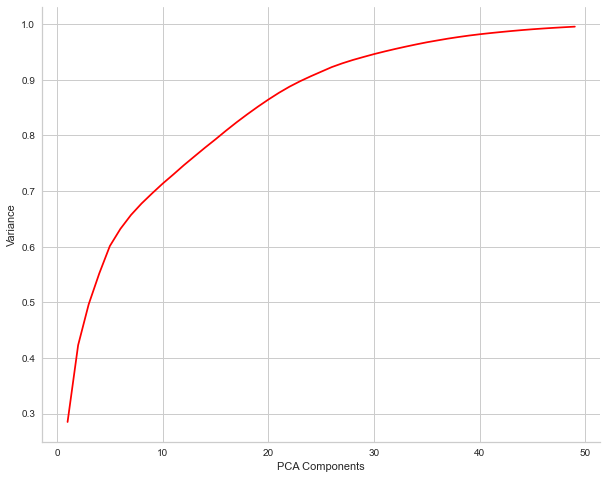

In [141]:
# log columns
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 50):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X_gb_scaled_log) # has 86 features
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')


plt.figure(figsize=(10,8))
sns.lineplot(x='n', y='var', data=pca_df, color='red')
plt.xlabel('PCA Components')
plt.ylabel('Variance')
plt.show()

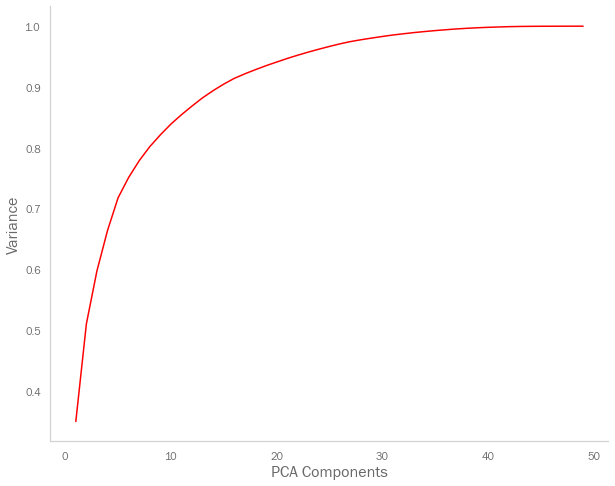

In [54]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 50):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X_gb_scaled) # has 86 features
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')


plt.figure(figsize=(10,8))
sns.lineplot(x='n', y='var', data=pca_df, color='red')
plt.xlabel('PCA Components')
plt.ylabel('Variance')
plt.show()

We can use 23 features to retain more than 90% of the information and reduce feature variables significantly in order for better clustering 

### Using K-Means with Calinski Harabasz & Inertia Score on the GB Dataset

In [142]:
# Now try K-Means on the gb dataset after PCA using 25 features
# Log dataset

PCAmod = PCA(n_components=35)
PCAmod.fit(X_gb_scaled_log)
PCA_df_gb_log = pd.DataFrame(PCAmod.transform(X_gb_scaled_log))

#Declare k_values
k_values = range(3,30)

#Initiate some empty lists for the GB dataset
km_preds_gb_log = []
km_cs_scores_gb_log = []
km_inertia_scores_gb_log = []

#Iterate through these
for k in k_values:
    #Instantiate and run a KMeans algorithm
    k_means = KMeans(n_clusters=k)
    k_means.fit(PCA_df_gb_log)
    
    #Store the predicted labels
    km_preds_gb_log.append(k_means.predict(PCA_df_gb_log))
    
    #Evaluate and store the clusters' Calinski Harabasz score
    cs_score = calinski_harabasz_score(PCA_df_gb_log, k_means.labels_)
    inertia_score = k_means.inertia_
    km_cs_scores_gb_log.append(cs_score)
    km_inertia_scores_gb_log.append(inertia_score)

In [143]:
gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(km_preds_gb_log[5], # We choose 8 clusters
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5,6,7
seat_types_yg,,,,,,,,
con lab marginal,70,38,8,6,3,18,1,3
con ld marginal,0,5,0,0,4,9,0,4
con pc marginal,0,0,0,0,1,0,0,0
con safe,27,137,0,0,21,73,0,1
con snp marginal,5,0,0,0,13,2,0,0
green safe,0,0,1,0,0,0,0,0
lab ld marginal,0,0,1,0,0,0,0,0
lab safe,54,3,22,30,0,3,0,23
lab snp marginal,9,1,0,0,0,0,0,0


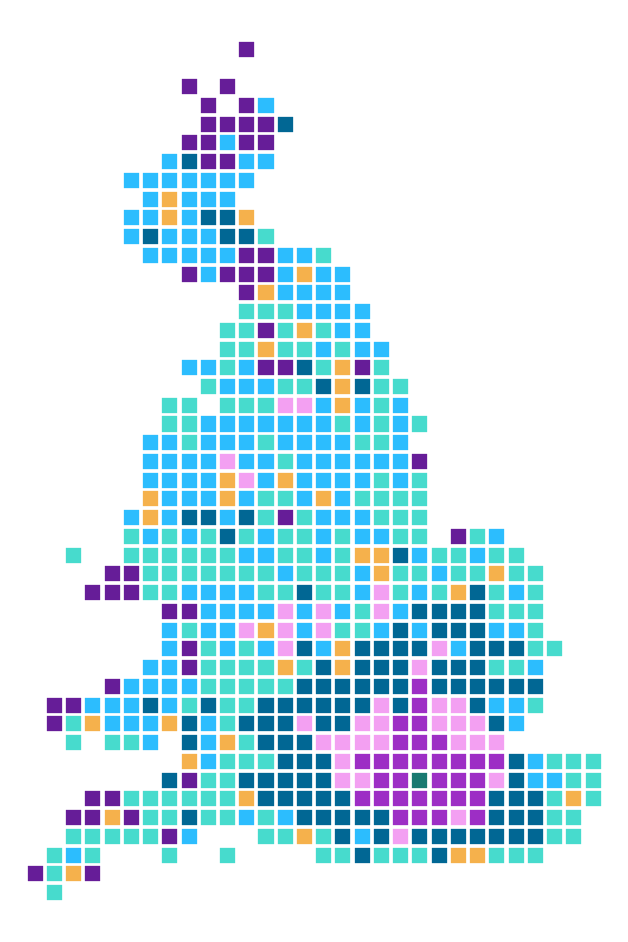

In [144]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

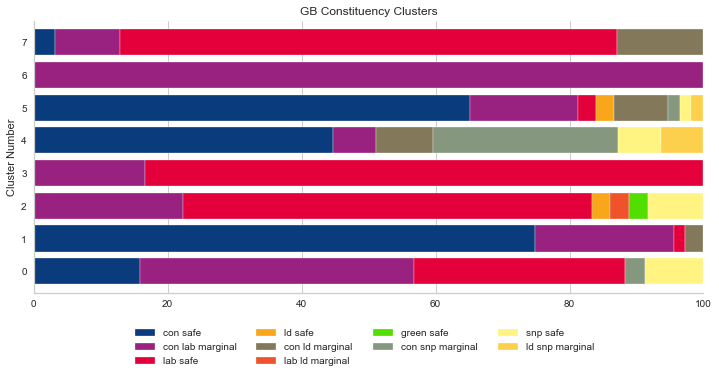

In [145]:
party_list = ['con safe','con lab marginal',
              'lab safe','ld safe',
              'con ld marginal','lab ld marginal',
              'green safe', 'con snp marginal', 'snp safe', 'ld snp marginal']

party_colors = [con_blue, con_lab, lab_red, lib_yel,
               con_lib, lab_lib, green_green, con_snp, snp_yel, lib_snp]

gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

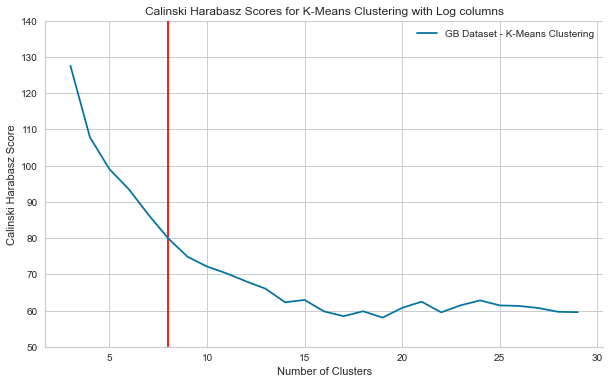

In [148]:
plt.figure(figsize=(10,6))

alpha = 1

plt.plot(k_values, km_cs_scores_gb_log, alpha=alpha,
            label='GB Dataset - K-Means Clustering')


plt.vlines(x=8, ymin=0, ymax=140, color='red')
plt.ylim(50,140)

plt.legend(frameon=False)

plt.title('Calinski Harabasz Scores for K-Means Clustering with Log columns')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score');

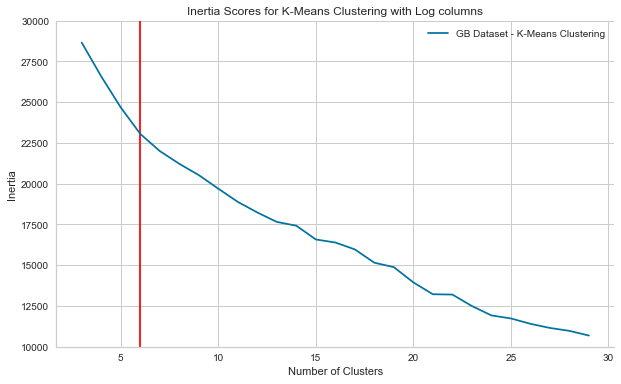

In [151]:
plt.figure(figsize=(10,6))

alpha = 1

plt.plot(k_values, km_inertia_scores_gb_log, alpha=alpha,
            label='GB Dataset - K-Means Clustering')


plt.vlines(x=6, ymin=0, ymax=40000, color='red')
plt.ylim(10000,30000)


plt.legend(frameon=False)

plt.title('Inertia Scores for K-Means Clustering with Log columns')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [55]:
# Now try K-Means on the gb dataset after PCA using 25 features

PCAmod = PCA(n_components=25)
PCAmod.fit(X_gb_scaled)
PCA_df_gb = pd.DataFrame(PCAmod.transform(X_gb_scaled))

#Declare k_values
k_values = range(3,30)

#Initiate some empty lists for the GB dataset
km_preds_gb = []
km_cs_scores_gb = []
km_inertia_scores_gb = []

#Iterate through these
for k in k_values:
    #Instantiate and run a KMeans algorithm
    k_means = KMeans(n_clusters=k)
    k_means.fit(PCA_df_gb)
    
    #Store the predicted labels
    km_preds_gb.append(k_means.predict(PCA_df_gb))
    
    #Evaluate and store the clusters' Calinski Harabasz score
    cs_score = calinski_harabasz_score(PCA_df_gb, k_means.labels_)
    inertia_score = k_means.inertia_
    km_cs_scores_gb.append(cs_score)
    km_inertia_scores_gb.append(inertia_score)

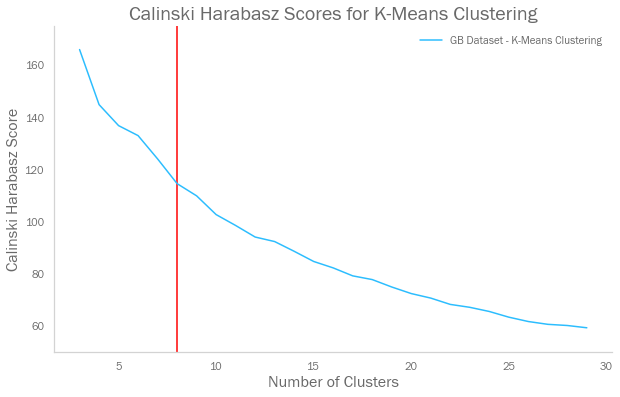

In [56]:
plt.figure(figsize=(10,6))

alpha = 1

plt.plot(k_values, km_cs_scores_gb, alpha=alpha,
            label='GB Dataset - K-Means Clustering')


plt.vlines(x=8, ymin=0, ymax=300, color='red')
plt.ylim(50,175)

plt.legend(frameon=False)

plt.title('Calinski Harabasz Scores for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score');

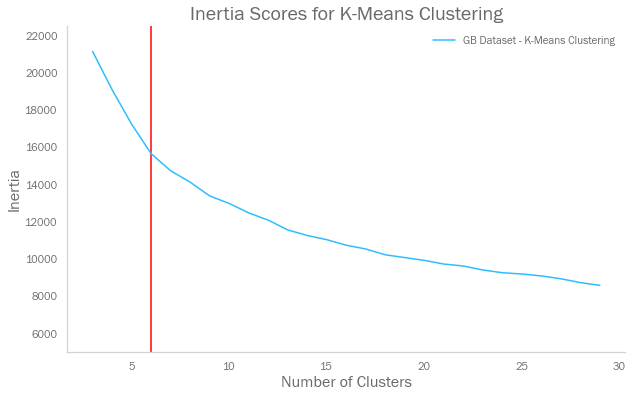

In [57]:
plt.figure(figsize=(10,6))

alpha = 1

plt.plot(k_values, km_inertia_scores_gb, alpha=alpha,
            label='GB Dataset - K-Means Clustering')
a

plt.vlines(x=6, ymin=0, ymax=40000, color='red')
plt.ylim(5000,22500)


plt.legend(frameon=False)

plt.title('Inertia Scores for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

### Using Gap Statistic

https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

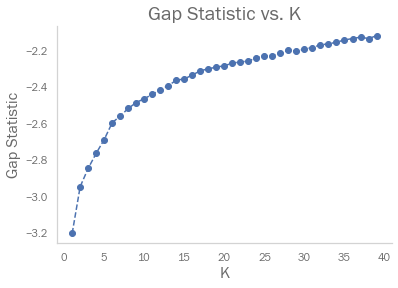

In [58]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
    # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
    # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)


score_g, df_gb_gap_stat = optimalK(PCA_df_gb, nrefs=5, maxClusters=40)
plt.plot(df_gb_gap_stat['clusterCount'], df_gb_gap_stat['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

A good K score would be 10

### Elbow Method

In [59]:
import yellowbrick

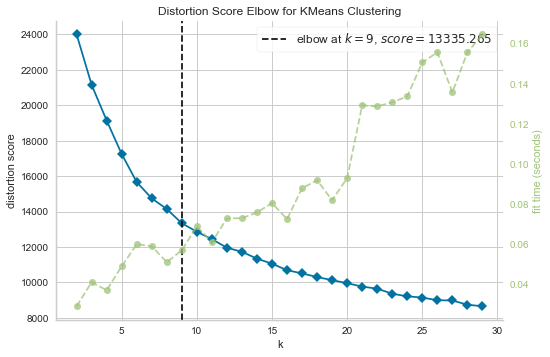

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(PCA_df_gb)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

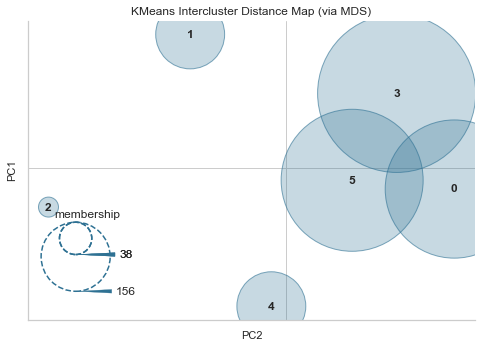

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [61]:
# Inter cluster distance map
from yellowbrick.cluster import InterclusterDistance
# Fit K-Means
kmeans_1 = KMeans(n_clusters=6,random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(PCA_df_gb)
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans_1)
visualizer.fit(PCA_df_gb)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Silhouette Score

Silhouette Coefficient is calculated using the mean intracluster distance (d1) and mean nearest cluster distance (d2)

(d2 - d1) / max(d2 - d1)

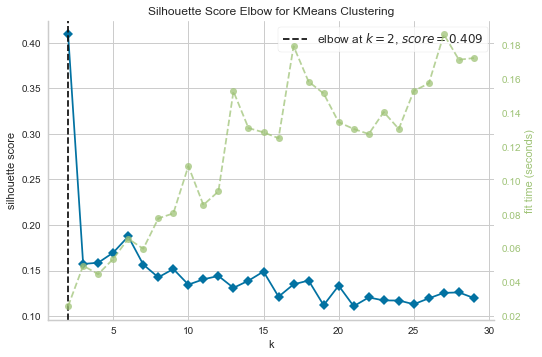

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [62]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(PCA_df_gb)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Optimal clusters based on Silhouette Score is 2 which means it only detects the conservative and labour party

### Calinski Harabasz Score

The Calinski Harabasz Score or Variance Ratio is the ratio between within-cluster dispersion and between-cluster dispersion

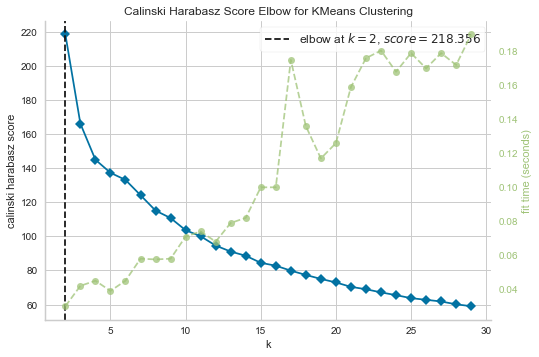

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [63]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(PCA_df_gb)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Davies-Bouldin Index

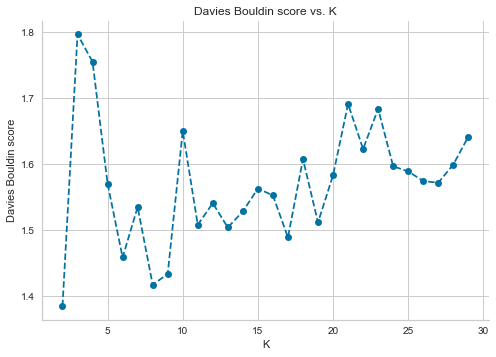

In [64]:
# As DB Index falls, clustering improves
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(PCA_df_gb, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

The Davies Bouldin score is minimized for k = 9 for the K-Means algorithm concerning the GB Dataset

BIC Score: Bayesian information criteria

In [65]:
from sklearn.mixture import GaussianMixture
n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov)
        gmm.fit(PCA_df_gb)
        score.append((cov,n_comp,gmm.bic(PCA_df_gb)))
score

[('spherical', 1, 56254.7267577929),
 ('spherical', 2, 50448.86332457462),
 ('spherical', 3, 49299.220268852994),
 ('spherical', 4, 47129.95028234548),
 ('spherical', 5, 46443.03291251631),
 ('spherical', 6, 46151.974649900396),
 ('spherical', 7, 45277.77353283549),
 ('spherical', 8, 45069.1007125921),
 ('spherical', 9, 44529.40631999954),
 ('spherical', 10, 44007.68587502705),
 ('spherical', 11, 43950.60597120612),
 ('spherical', 12, 43843.276408387195),
 ('spherical', 13, 43332.13765796287),
 ('spherical', 14, 43780.46338384345),
 ('spherical', 15, 43675.58398991078),
 ('spherical', 16, 43060.50638869032),
 ('spherical', 17, 43358.599573927946),
 ('spherical', 18, 42638.960282364256),
 ('spherical', 19, 43122.116923027614),
 ('spherical', 20, 42962.98598734497),
 ('spherical', 21, 42568.789646401936),
 ('spherical', 22, 42515.72946167827),
 ('spherical', 23, 42298.95395904537),
 ('spherical', 24, 42237.75347286972),
 ('spherical', 25, 42580.686528909195),
 ('spherical', 26, 42339.891

Based on the diag covariance type, we can  see that 5 clusters generate the lowest BIC score 

Using the Elbow method, Davies Bouldin Index and BIC score, we can conclude that 8 clusters perhaps is likely to be the best segmentation of the GB dataset

#### K-Means Score after picking 8 Clusters

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Fit K-Means
kmeans_1 = KMeans(n_clusters=7,random_state= 10)

# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(PCA_df_gb)

# Calculate cluster validation metrics
score_kemans_s = silhouette_score(PCA_df_gb, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(PCA_df_gb, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(PCA_df_gb, predictions)


print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.1562
Calinski Harabasz Score: 124.0065
Davies Bouldin Score: 1.5356


We will compare these scores with the HAC to find out whether K-Means outperforms the former or not

### Choose 8 Clusters for GB

In [67]:
gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(km_preds_gb[5], # We choose 8 clusters
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5,6,7
seat_types_yg,,,,,,,,
con lab marginal,59,6,6,3,24,25,16,8
con ld marginal,0,0,4,4,5,0,9,0
con pc marginal,0,0,1,0,0,0,0,0
con safe,59,0,35,1,104,4,56,0
con snp marginal,5,0,13,0,1,0,1,0
green safe,0,0,0,0,0,0,0,1
lab ld marginal,0,0,0,0,1,0,0,0
lab safe,33,24,0,23,1,26,4,24
lab snp marginal,7,0,0,0,1,2,0,0


In [68]:
gb_cluster_yg

,seat_types_yg,Cluster
ID,,
E14000554,con safe,2
E14000569,con lab marginal,0
E14000574,lab safe,0
E14000575,con lab marginal,0
E14000641,con lab marginal,7
...,...,...
W07000076,lab safe,0
W07000077,lab safe,0
W07000078,con lab marginal,4


In [69]:
gb_cluster_yg[['seat_types_yg']].nunique()

seat_types_yg    14
dtype: int64

In [70]:
gb_cluster_yg

,seat_types_yg,Cluster
ID,,
E14000554,con safe,2
E14000569,con lab marginal,0
E14000574,lab safe,0
E14000575,con lab marginal,0
E14000641,con lab marginal,7
...,...,...
W07000076,lab safe,0
W07000077,lab safe,0
W07000078,con lab marginal,4


In [71]:
gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5,6,7
seat_types_yg,,,,,,,,
con lab marginal,59,6,6,3,24,25,16,8
con ld marginal,0,0,4,4,5,0,9,0
con pc marginal,0,0,1,0,0,0,0,0
con safe,59,0,35,1,104,4,56,0
con snp marginal,5,0,13,0,1,0,1,0
green safe,0,0,0,0,0,0,0,1
lab ld marginal,0,0,0,0,1,0,0,0
lab safe,33,24,0,23,1,26,4,24
lab snp marginal,7,0,0,0,1,2,0,0


In [72]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

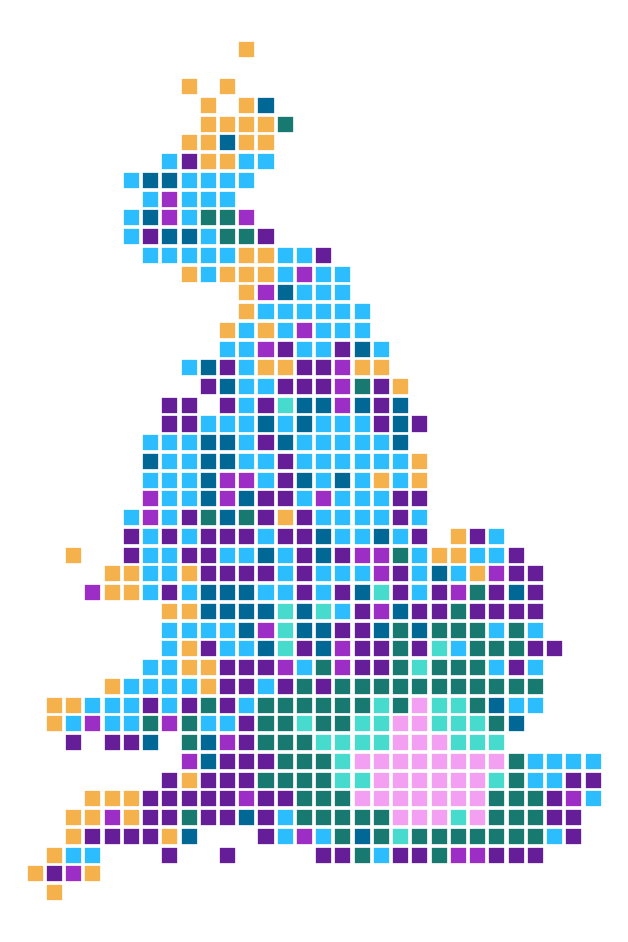

In [73]:
kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

In [74]:
party_list = ['con safe','con lab marginal',
              'lab safe','ld safe',
              'con ld marginal','lab ld marginal',
              'green safe', 'con snp marginal', 'snp safe', 'ld snp marginal']

party_colors = [con_blue, con_lab, lab_red, lib_yel,
               con_lib, lab_lib, green_green, con_snp, snp_yel, lib_snp]

gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

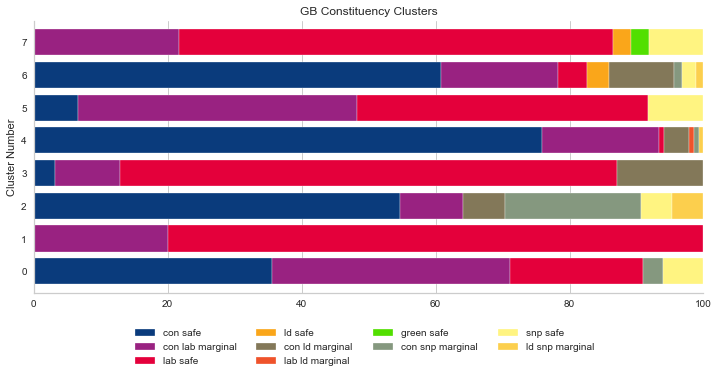

In [75]:
gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

Cluster 3, 5, and 7 seem to be predominently labour. Let us see the characteristics of consituencies within these clusters

In [76]:
df_name = pd.read_csv('names.csv')

In [77]:
df_name.set_index('ID', inplace=True)

In [78]:
df_name

,Constituency
ID,
E14000554,Berwick-upon-Tweed
E14000569,Bishop Auckland
E14000574,Blaydon
E14000575,Blyth Valley
E14000641,City of Durham
...,...
W07000076,Caerphilly
W07000077,Islwyn
W07000078,Vale of Glamorgan


Find the constituencies in cluster 5 which are con lab marginal

In [79]:
df_name

,Constituency
ID,
E14000554,Berwick-upon-Tweed
E14000569,Bishop Auckland
E14000574,Blaydon
E14000575,Blyth Valley
E14000641,City of Durham
...,...
W07000076,Caerphilly
W07000077,Islwyn
W07000078,Vale of Glamorgan


In [80]:
df_name.loc[list(gb_cluster_yg.loc[(gb_cluster_yg['Cluster']==5)
                  &(gb_cluster_yg['seat_types_yg']=='con lab marginal')].index)]

,Constituency
ID,
E14000578,Bolton North East
E14000588,Bradford South
E14000756,Huddersfield
E14000771,Kingston upon Hull East
E14000773,Kingston upon Hull West and Hessle
E14000904,Rotherham
E14000662,Derby North
E14000663,Derby South
E14000861,Northampton North


In [81]:
def cluster_IDs(cluster, cluster_data, cluster_col='Cluster'):
    
    '''
    Takes a cluster label (1, 2, 3, etc.) and a cluster dataframe,
    and returns a list of constituency IDs that belong to the given cluster
    '''
    return list(cluster_data.loc[cluster_data['Cluster']==cluster].index)



def cluster_kpi(kpi, data, cluster_data, cluster_col='Cluster'):
    
    '''
    For a given set of cluster labels, and a given KPI, returns a
    dataframe with one row, for that given kpi
    '''
    
    #Find the unique cluster labels
    cluster_labels = sorted(list(cluster_data[cluster_col].unique()))
    
    #Declare an empty list to store the KPI data in
    kpi_values = []
    
    #Iterate through the labels
    for i in cluster_labels:
        #Work out which constituencies are in the cluster
        cluster_index = cluster_IDs(cluster = i,
                                    cluster_data = cluster_data,
                                    cluster_col = cluster_col)
        
        #Go to the data table, and find the mean for that kpi
        #for those constituencies. Append to the list
        mean = data.loc[cluster_index, kpi].mean()
        kpi_values.append(mean)
        
    #Create and return a dataframe as required
    return pd.DataFrame([kpi_values],
                        columns = cluster_labels,
                        index = [kpi])



def cluster_kpis(kpis, data, cluster_data, cluster_col='Cluster'):
    
    '''
    For a list of KPIs, return a dataframe showing mean
    values on a cluster by cluster basis
    
    '''
    
    #Declare an empty dataframe
    df_temp = pd.DataFrame()
    
    #For each kpi, find the average cluster means, and append to the dataframe
    for i in kpis:
        cluster_values = cluster_kpi(kpi=i,
                                     data=data,
                                     cluster_data=cluster_data,
                                     cluster_col=cluster_col)
        
        df_temp = pd.concat([df_temp, cluster_values])
        
    return df_temp
        
        

def heatmap_cluster_kpis(kpis, data,
                       cluster_data,
                       size=0.4,
                       cmap=CB91_Grad_BP,
                       cluster_col='Cluster'):
    
    '''
    Heatmap the table produced by the cluster_kpis function
    '''
    
    #Calculate the required table and transpose
    df_temp = cluster_kpis(kpis=kpis,
                           data=data,
                           cluster_data=cluster_data,
                           cluster_col=cluster_col).T
    
    #For each kpi, scale as required
    scaler = MinMaxScaler()
    scaler.fit(df_temp)
    df_scale = scaler.transform(df_temp)
    
    df_scale = pd.DataFrame(df_scale,
                            columns=df_temp.columns,
                            index=df_temp.index)
    
    height = size*len(df_scale.index)
    width = 1.1*size*len(df_scale.columns)
    
    plt.figure(figsize=(width,height))
    sns.heatmap(df_scale,cbar=True,cmap=cmap)
    plt.yticks(rotation='horizontal')
    

    
#Define a standard list of KPIs to look at
kpis_gb=['Pop_Density',
      '2019_Wage', 'HousePricePerWage', '%HousePriceGrowth',
      '%OwnOutright','%OwnWithMort', '%PrivateRent',
      '%SocialHousing','%Unemployment', 'UnemploymentChange',
      '%Heavy Industry & Manufacturing', '%Wholesale & Retail',
      '%FS & ICT', '%White', '%Muslim', '%BornUK',
      '%Level4+', '%LeaveVote']

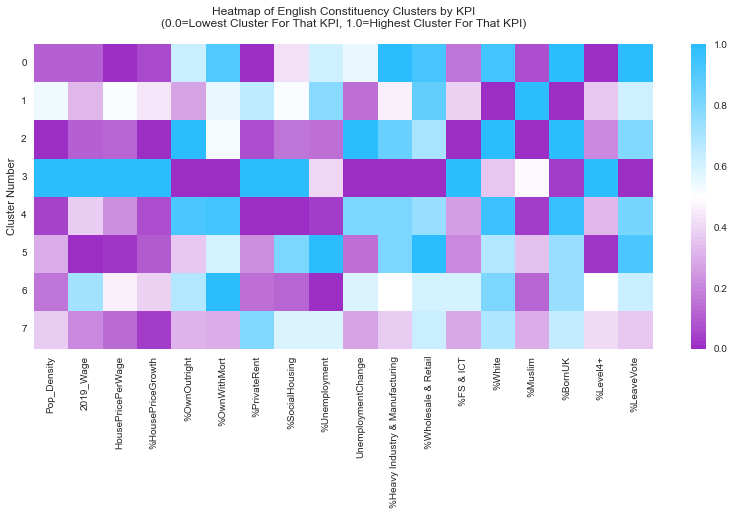

In [82]:
heatmap_cluster_kpis(kpis=kpis_gb,
        data=df_gb,cmap=CB91_Grad_BWP[::-1],size=0.7,
        cluster_data=gb_cluster_yg)

plt.title('Heatmap of English Constituency Clusters by KPI\n\
(0.0=Lowest Cluster For That KPI, 1.0=Highest Cluster For That KPI)\n')
plt.ylabel('Cluster Number');

In [83]:
# Cluster 3, 5, 7 - Somewhat high unemployment overall,  Cluster 5 is mostly labour, we see very few %white, born UK, mostly 
# Muslim

## Using HAC on the GB Dataset

In [68]:
# Now try K-Means on the gb dataset after PCA using 25 features

PCAmod = PCA(n_components=25)
PCAmod.fit(X_gb_scaled)
PCA_df_gb = pd.DataFrame(PCAmod.transform(X_gb_scaled))

#Declare k_values
k_values = range(3,30)

#Initiate some empty lists for the GB dataset
hac_preds_gb = []
hac_cs_scores_gb = []

#Iterate through these
for k in k_values:
    #Instantiate and run a KMeans algorithm
    agg_clust = AgglomerativeClustering(n_clusters=k)
    preds = agg_clust.fit_predict(PCA_df_gb)

    #Store the predicted labels
    hac_preds_gb.append(preds)
    
    #Evaluate and store the clusters' Calinski Harabasz score
    cs_score = calinski_harabasz_score(PCA_df_gb, preds)
    hac_cs_scores_gb.append(cs_score)

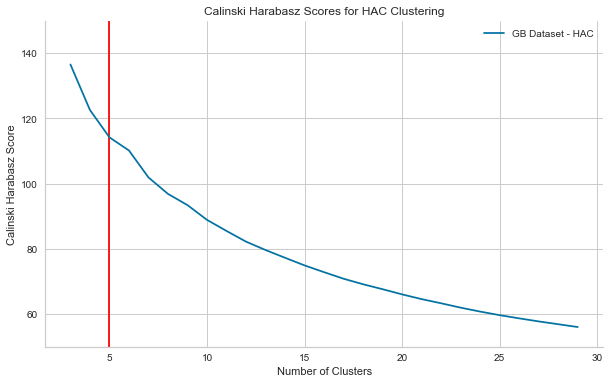

In [69]:
plt.figure(figsize=(10,6))

alpha = 1

plt.plot(k_values, hac_cs_scores_gb, alpha=alpha,
            label='GB Dataset - HAC')
8
plt.vlines(x=5, ymin=0, ymax=150, color='red')
plt.ylim(50,150)

plt.legend(frameon=False)

plt.title('Calinski Harabasz Scores for HAC Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score');

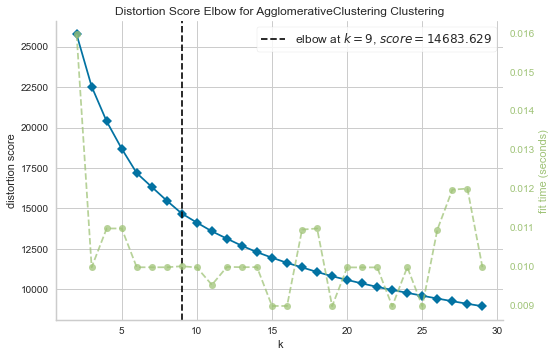

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(PCA_df_gb)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

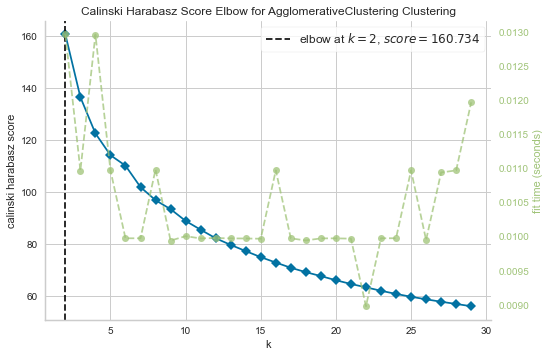

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [71]:
# Calinski Harabasz Score for K means
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(PCA_df_gb)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

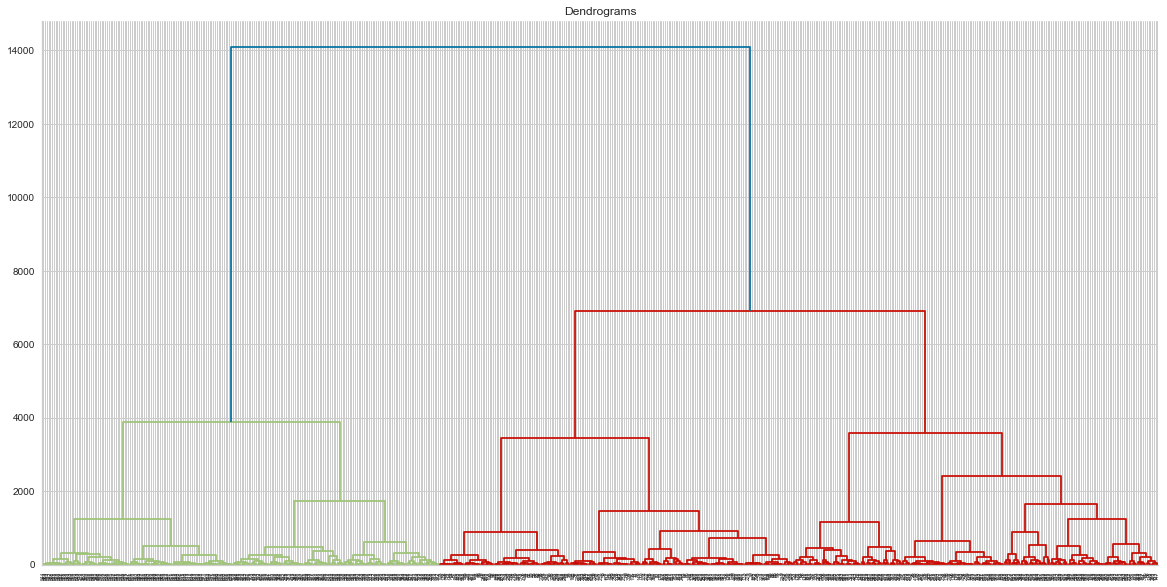

In [72]:
# Dendogram for Heirarchical Clustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

 
model = AgglomerativeClustering(n_clusters=8)
model = model.fit(PCA_df_gb)
Z = hierarchy.linkage(model.children_, 'ward')
plt.figure(figsize=(20,10))
plt.title("Dendrograms") 
dn = hierarchy.dendrogram(Z)

In [73]:
model.n_clusters

8

5 Clusters looks appropriate according to the dendogram

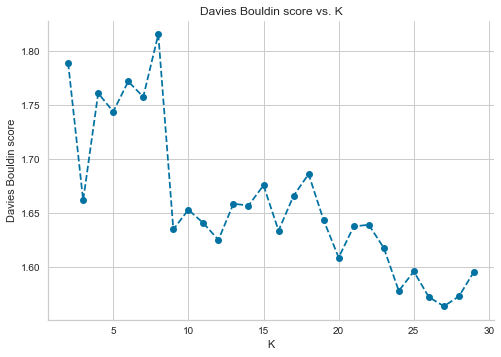

In [74]:
# Davies Bouldin score for HAC
from sklearn.metrics import davies_bouldin_score
def get_hac_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    AC = AgglomerativeClustering(n_clusters=center)
    # Then fit the model to your data using the fit method
    model = AC.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_hac_score(PCA_df_gb, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


We will go with 8 clusters

In [75]:
# define the model
model = AgglomerativeClustering(n_clusters=8)

# fit model and predict clusters
yhat = model.fit(PCA_df_gb)
yhat_2 = model.fit_predict(PCA_df_gb)

# retrieve unique clusters
clusters = np.unique(yhat)

# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(PCA_df_gb, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(PCA_df_gb, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(PCA_df_gb, yhat_2)

print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.0989
Calinski Harabasz Score: 96.8785
Davies Bouldin Score: 1.8153


In [76]:
# K Means Score after 8 clusters - obviously HAC outperforms KMeans in the GB dataset indicating it came up with 
# better clustering

Silhouette Score: 0.1459 \
Calinski Harabasz Score: 116.4850 \
Davies Bouldin Score: 1.4179 

In [77]:
gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(hac_preds_gb[6], # We choose 8 clusters
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5,6,7,8
seat_types_yg,,,,,,,,,
con lab marginal,20,3,6,22,4,56,7,28,1
con ld marginal,10,0,4,0,4,0,0,4,0
con pc marginal,0,0,1,0,0,0,0,0,0
con safe,108,0,34,6,1,29,0,81,0
con snp marginal,0,0,13,0,0,6,0,1,0
green safe,0,0,0,0,0,0,1,0,0
lab ld marginal,1,0,0,0,0,0,0,0,0
lab safe,2,31,0,27,22,37,14,2,0
lab snp marginal,0,0,0,0,0,10,0,0,0


In [78]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

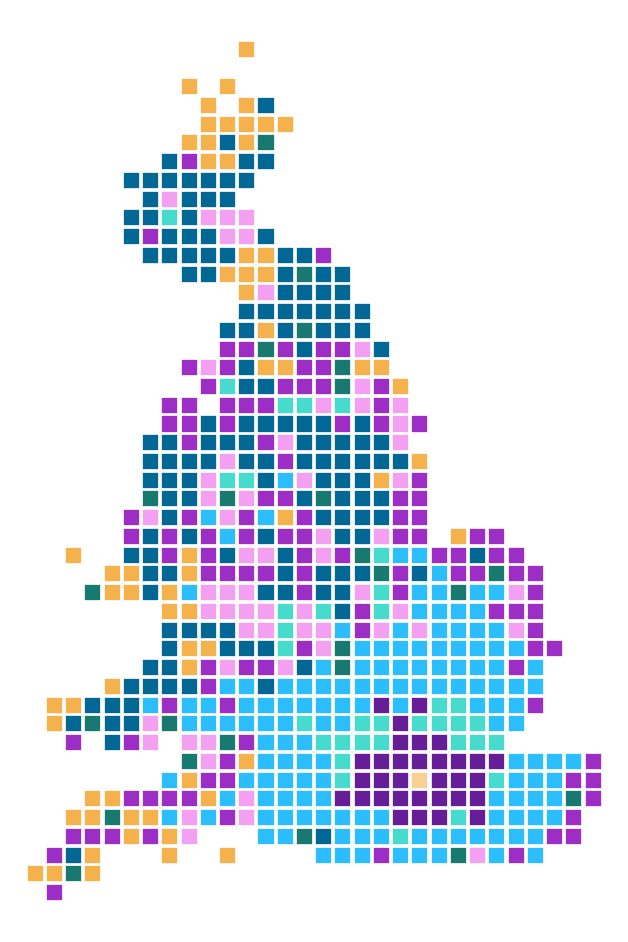

In [79]:
kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

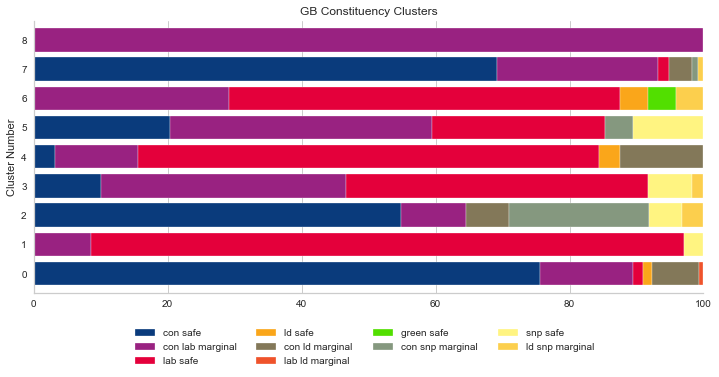

In [80]:
party_list = ['con safe','con lab marginal',
              'lab safe','ld safe',
              'con ld marginal','lab ld marginal',
              'green safe', 'con snp marginal', 'snp safe', 'ld snp marginal']

party_colors = [con_blue, con_lab, lab_red, lib_yel,
               con_lib, lab_lib, green_green, con_snp, snp_yel, lib_snp]

gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

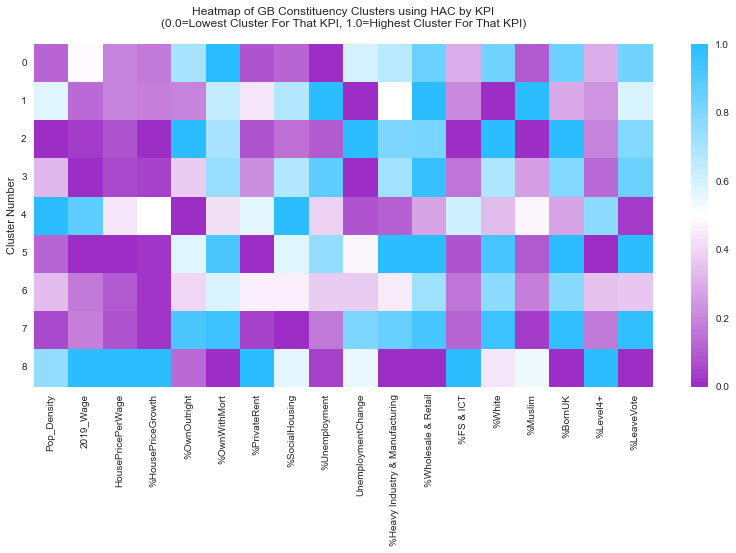

In [81]:
heatmap_cluster_kpis(kpis=kpis_gb,
        data=df_gb,cmap=CB91_Grad_BWP[::-1],size=0.7,
        cluster_data=gb_cluster_yg)

plt.title('Heatmap of GB Constituency Clusters using HAC by KPI\n\
(0.0=Lowest Cluster For That KPI, 1.0=Highest Cluster For That KPI)\n')
plt.ylabel('Cluster Number');

https://towardsdatascience.com/dbscan-clustering-algorithm-how-to-build-powerful-density-based-models-21d9961c4cec

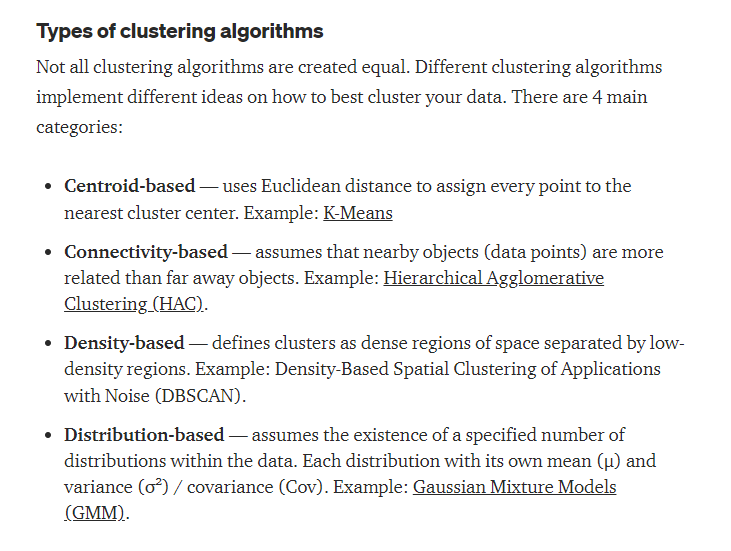

### Density Based Clustering

In [82]:
from sklearn.cluster import DBSCAN

In [83]:
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
X_gb_scaled = scaler.fit_transform(X_gb)

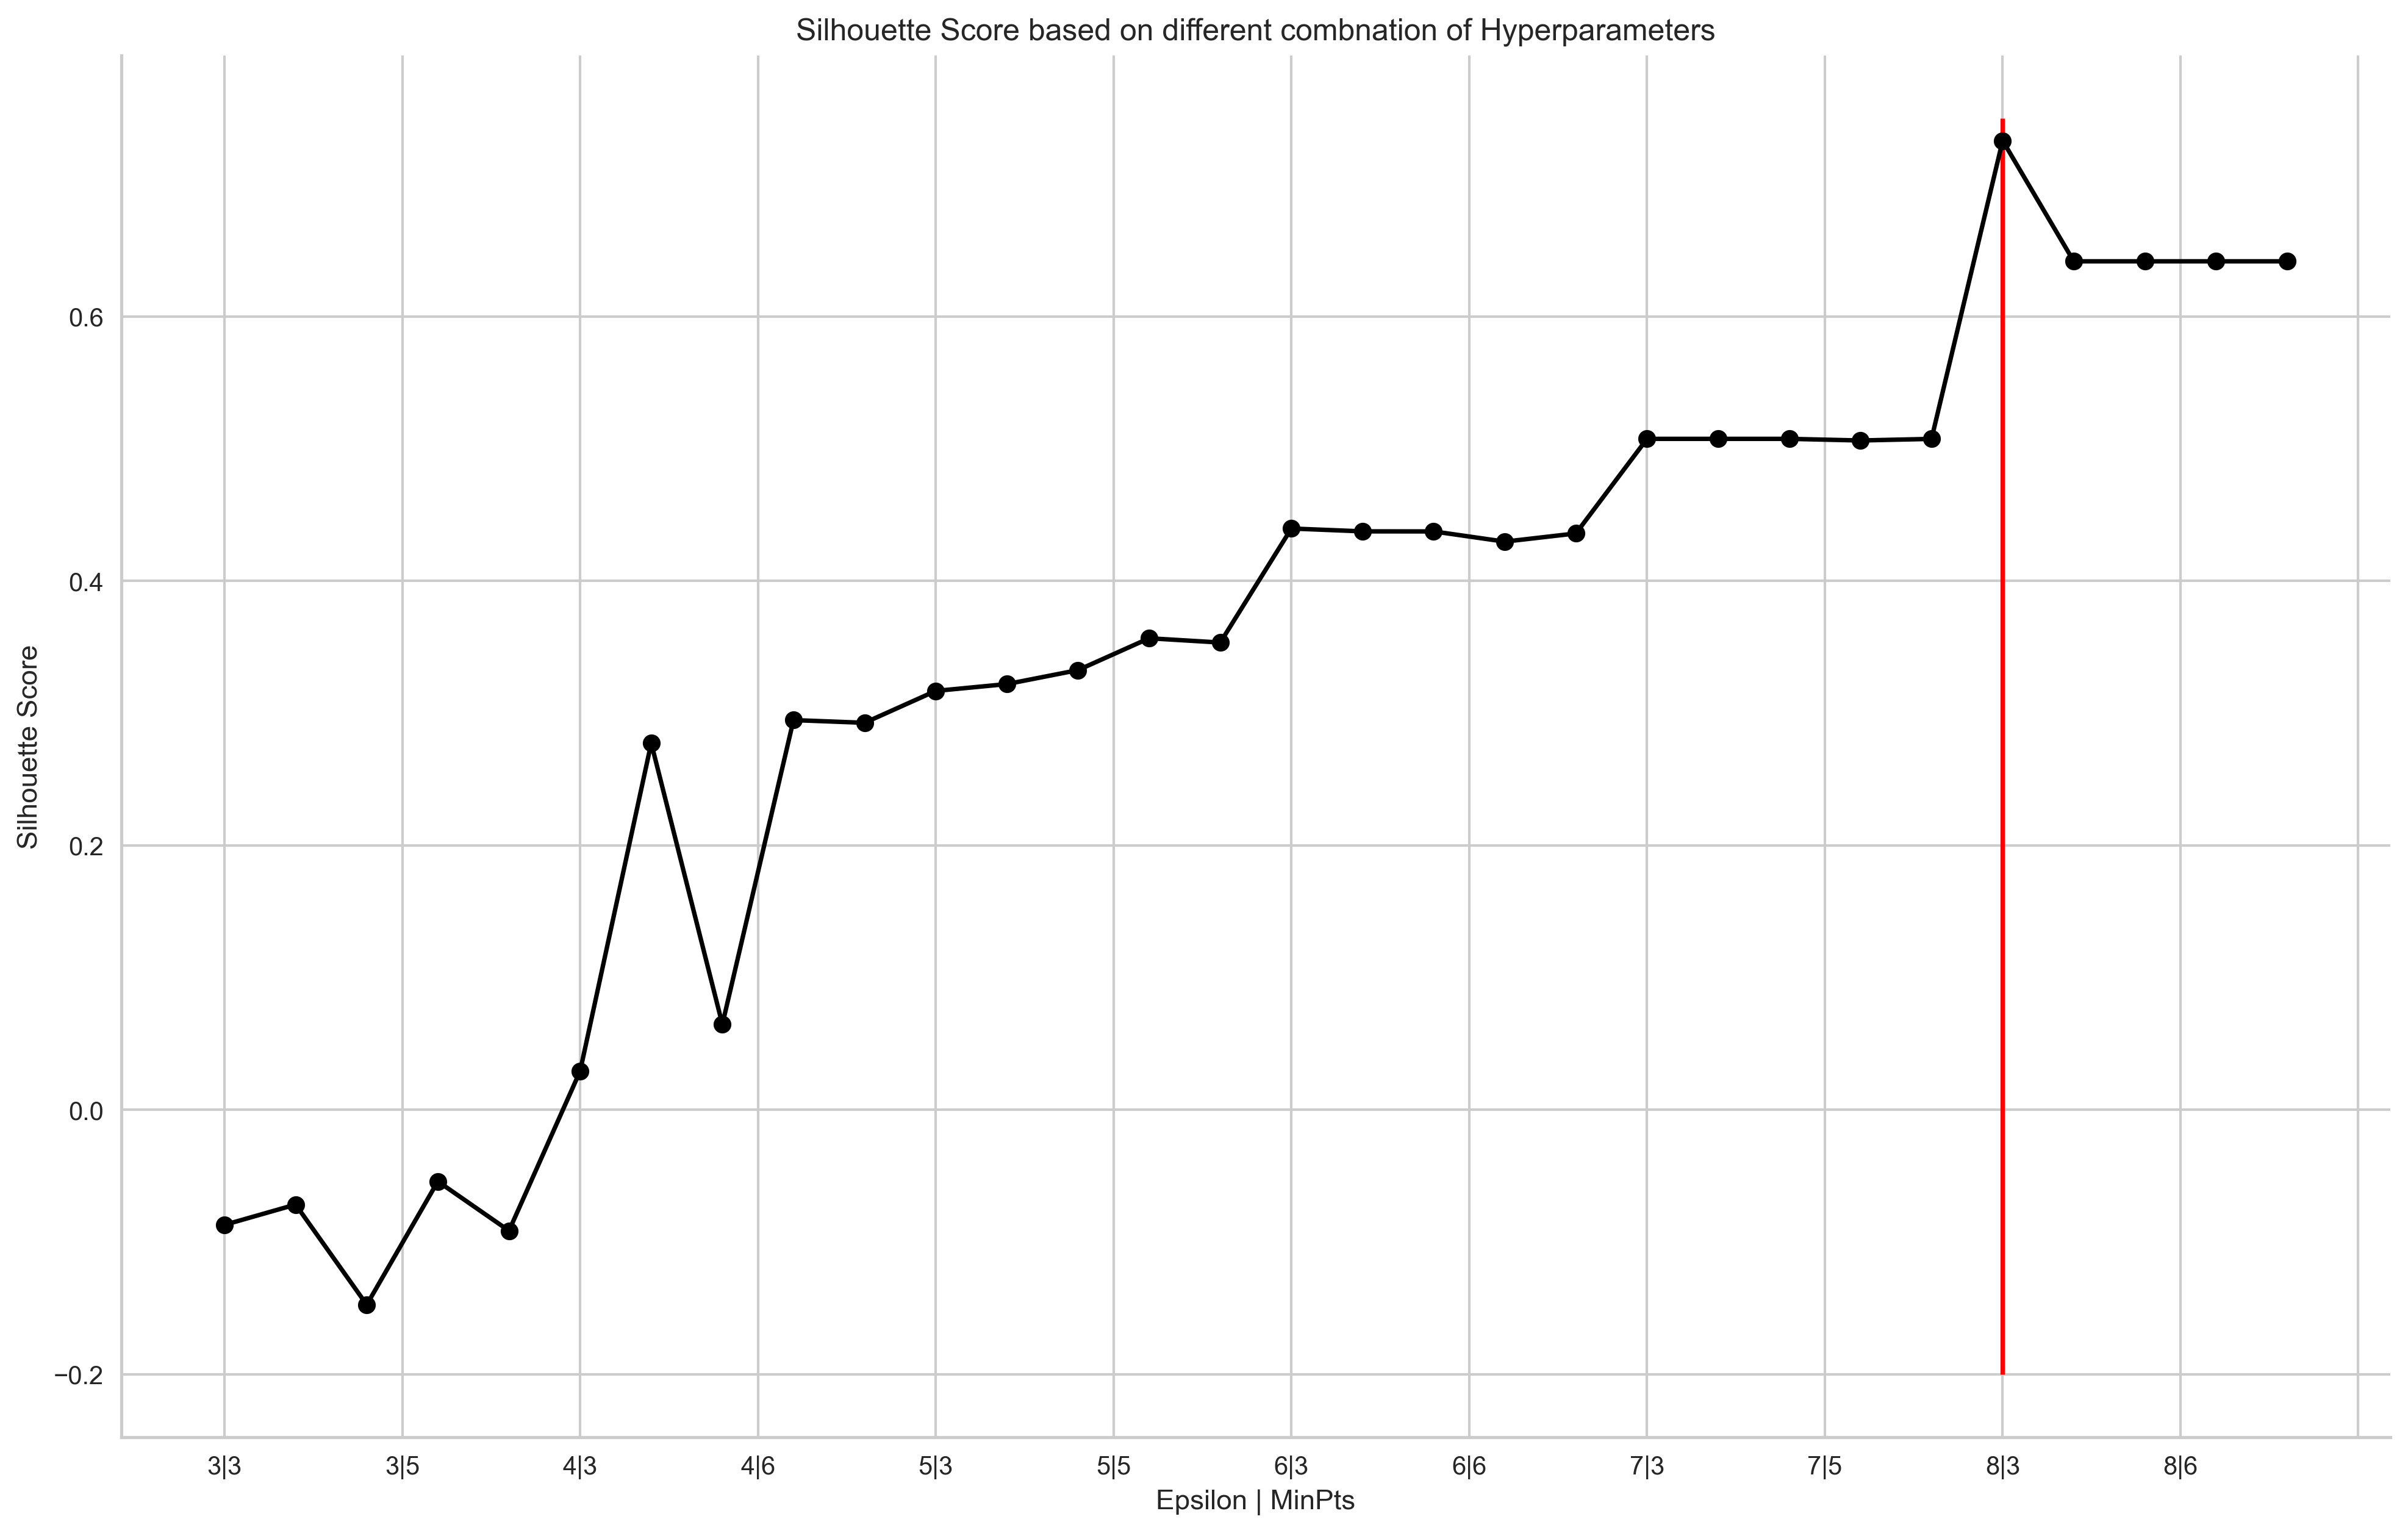

<Figure size 576x396 with 0 Axes>

In [84]:
PCAmod = PCA(n_components=25)
PCAmod.fit(X_gb_scaled)
PCA_df_gb = pd.DataFrame(PCAmod.transform(X_gb_scaled))

# To decide what hyperparameters (epsilon and min samples) to use, we will look at the Silhouette score

from sklearn import metrics

# Create empty lists
S=[] # this is to store Silhouette scores
D = [] # Check davies bouldin score
H = [] # Check calinski harabasz

comb=[] # this is to store combinations of epsilon / min_samples

# Define ranges to explore
eps_range=range(3, 9) # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range
minpts_range=range(3,8)

for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        model = DBSCAN(eps=k, min_samples=j)
        # Fit the model 
        clm = model.fit(PCA_df_gb)
        # Calculate Silhoutte, Davies Bouldin and Harabasz Score and append to a list
        S.append(metrics.silhouette_score(PCA_df_gb, clm.labels_, metric='euclidean'))
        D.append(metrics.davies_bouldin_score(PCA_df_gb, clm.labels_))
        H.append(metrics.calinski_harabasz_score(PCA_df_gb, clm.labels_))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph


# Plot the resulting Silhouette scores on a graph
fig = plt.figure(figsize=(16,10), dpi=300)
ax = plt.subplot(1, 1, 1)
plt.plot(comb, S, 'bo-', color='black')
from matplotlib.ticker import MaxNLocator

ax.xaxis.set_major_locator(MaxNLocator(15))

plt.xlabel('Epsilon | MinPts')
plt.ylabel('Silhouette Score')
plt.vlines(x=25, ymin=-0.2, ymax=0.75, color='red')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()
plt.tight_layout()

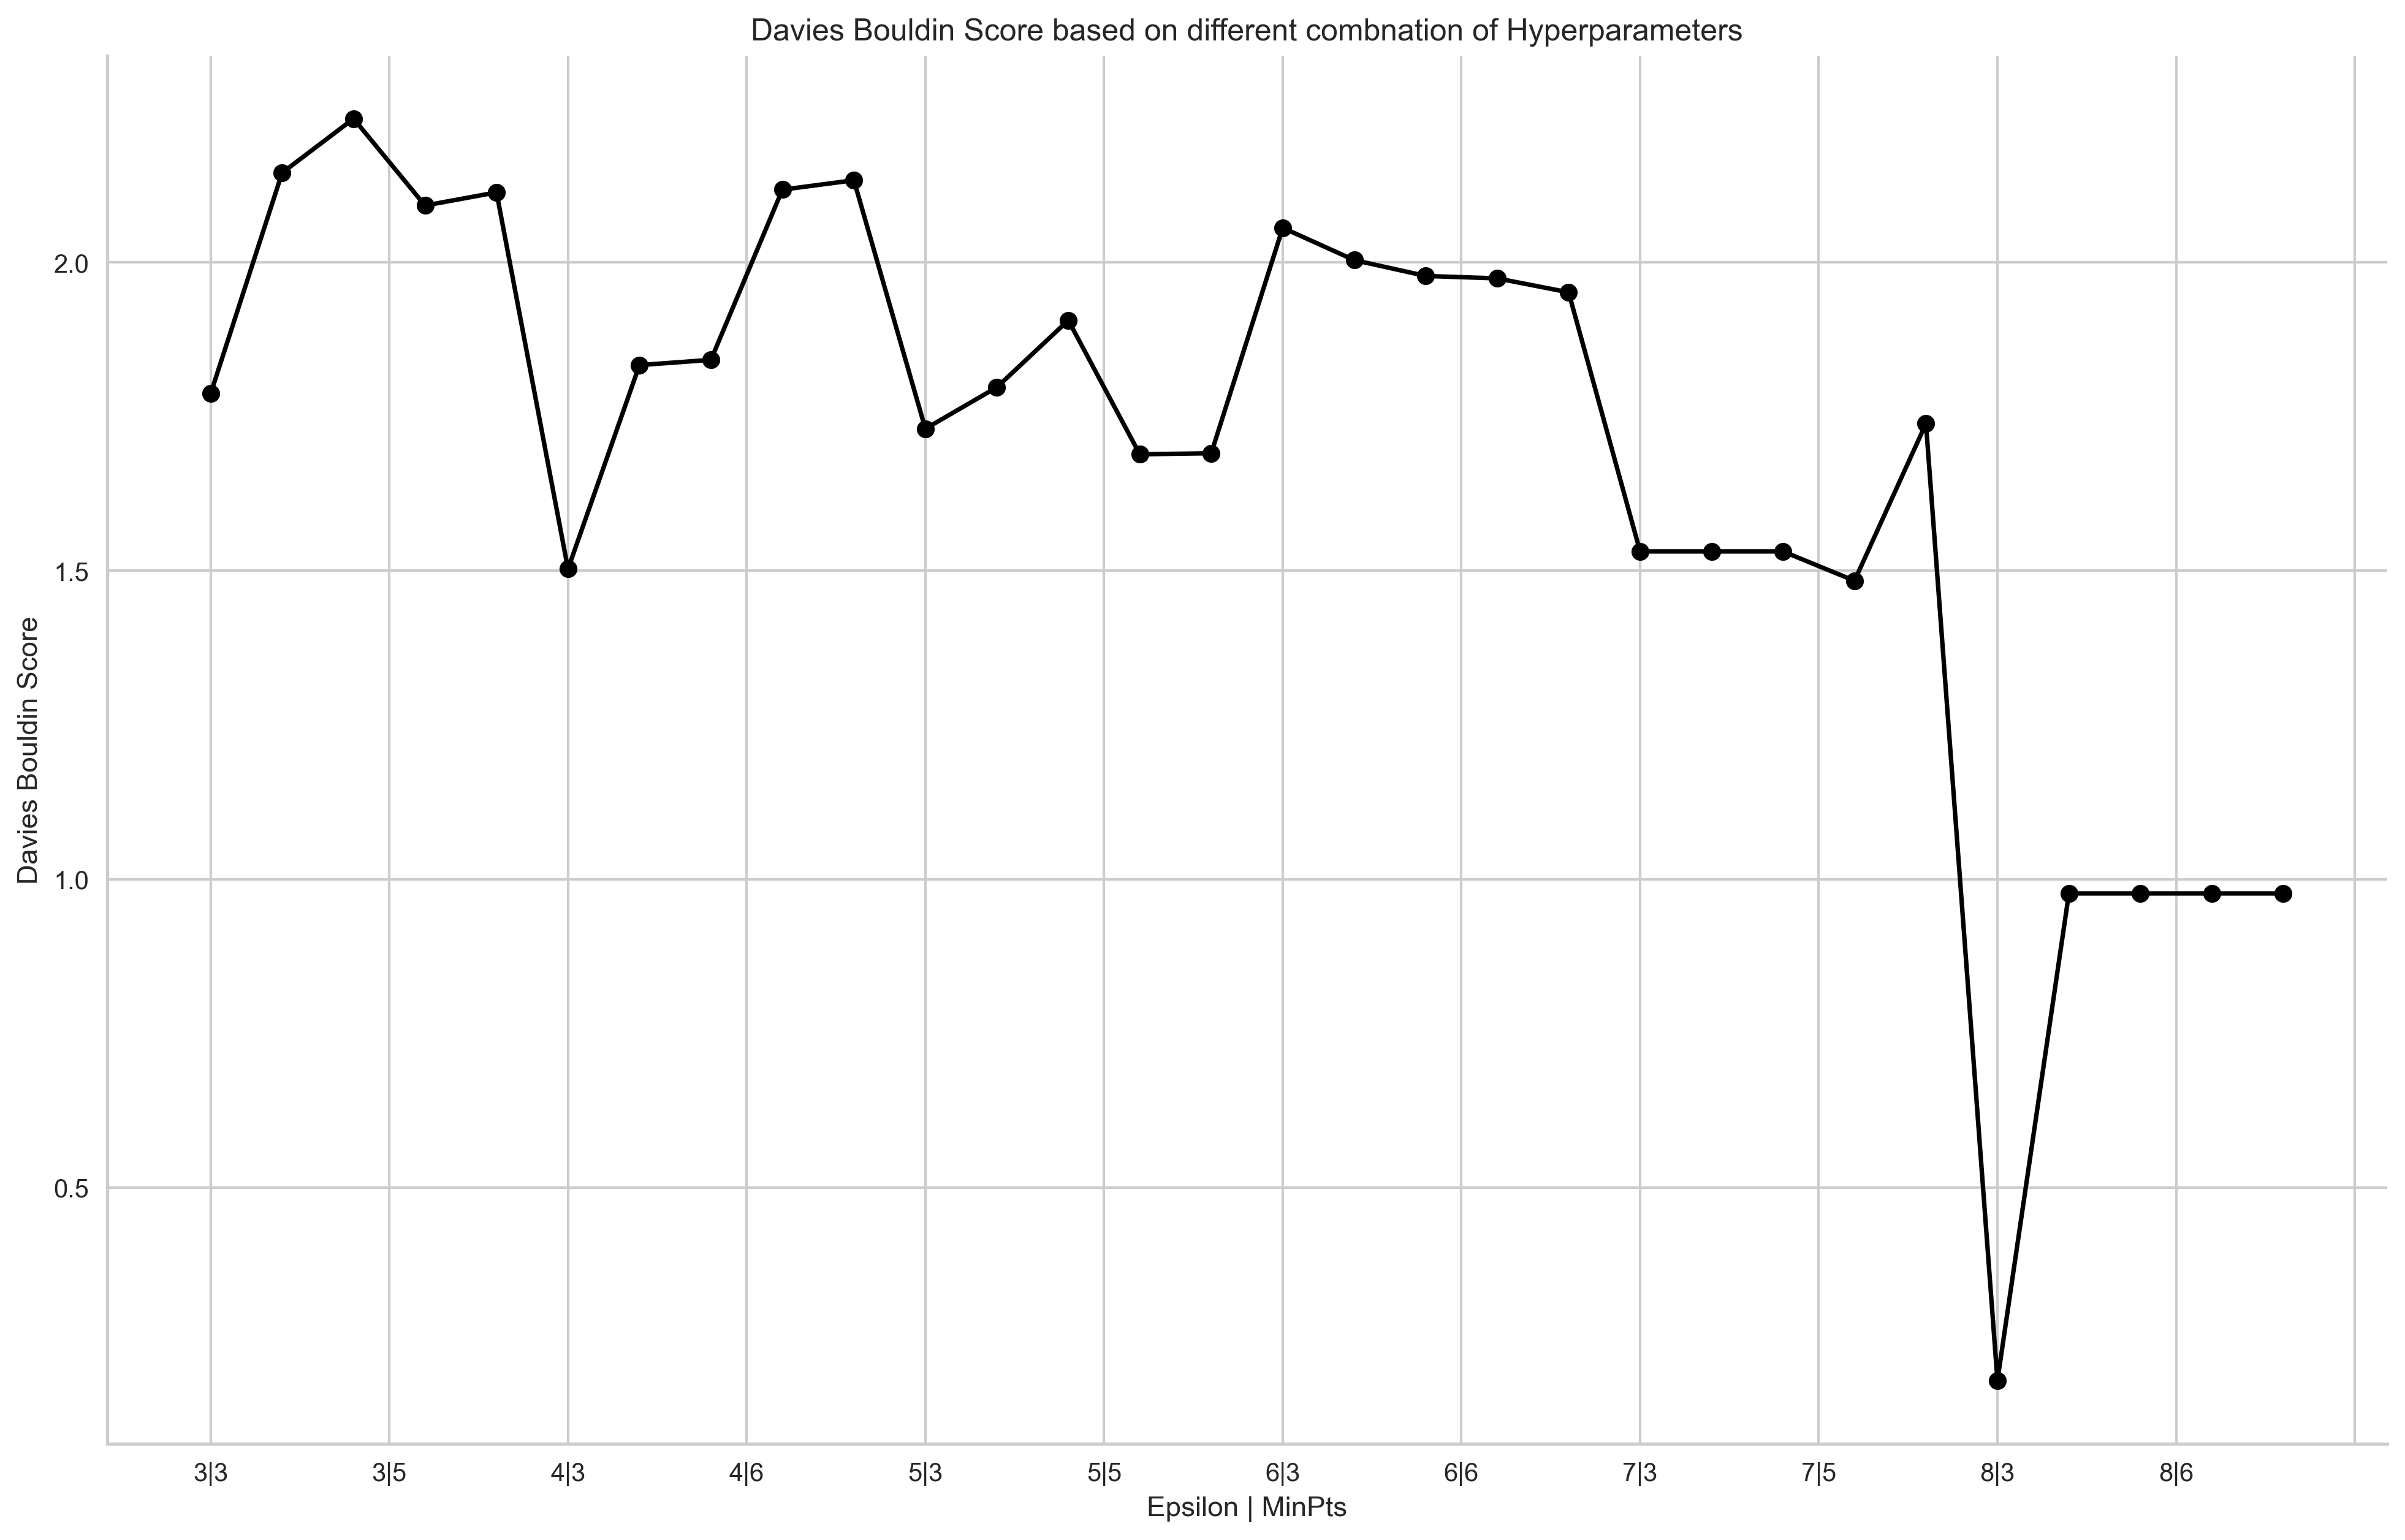

<Figure size 576x396 with 0 Axes>

In [85]:
fig = plt.figure(figsize=(16,10), dpi=300)
ax = plt.subplot(1, 1, 1)
plt.plot(comb, D, 'bo-', color='black')
from matplotlib.ticker import MaxNLocator

ax.xaxis.set_major_locator(MaxNLocator(15))

plt.xlabel('Epsilon | MinPts')
plt.ylabel('Davies Bouldin Score')
# plt.vlines(x=25, ymin=-0.2, ymax=0.75, color='red')
plt.title('Davies Bouldin Score based on different combnation of Hyperparameters')
plt.show()
plt.tight_layout()

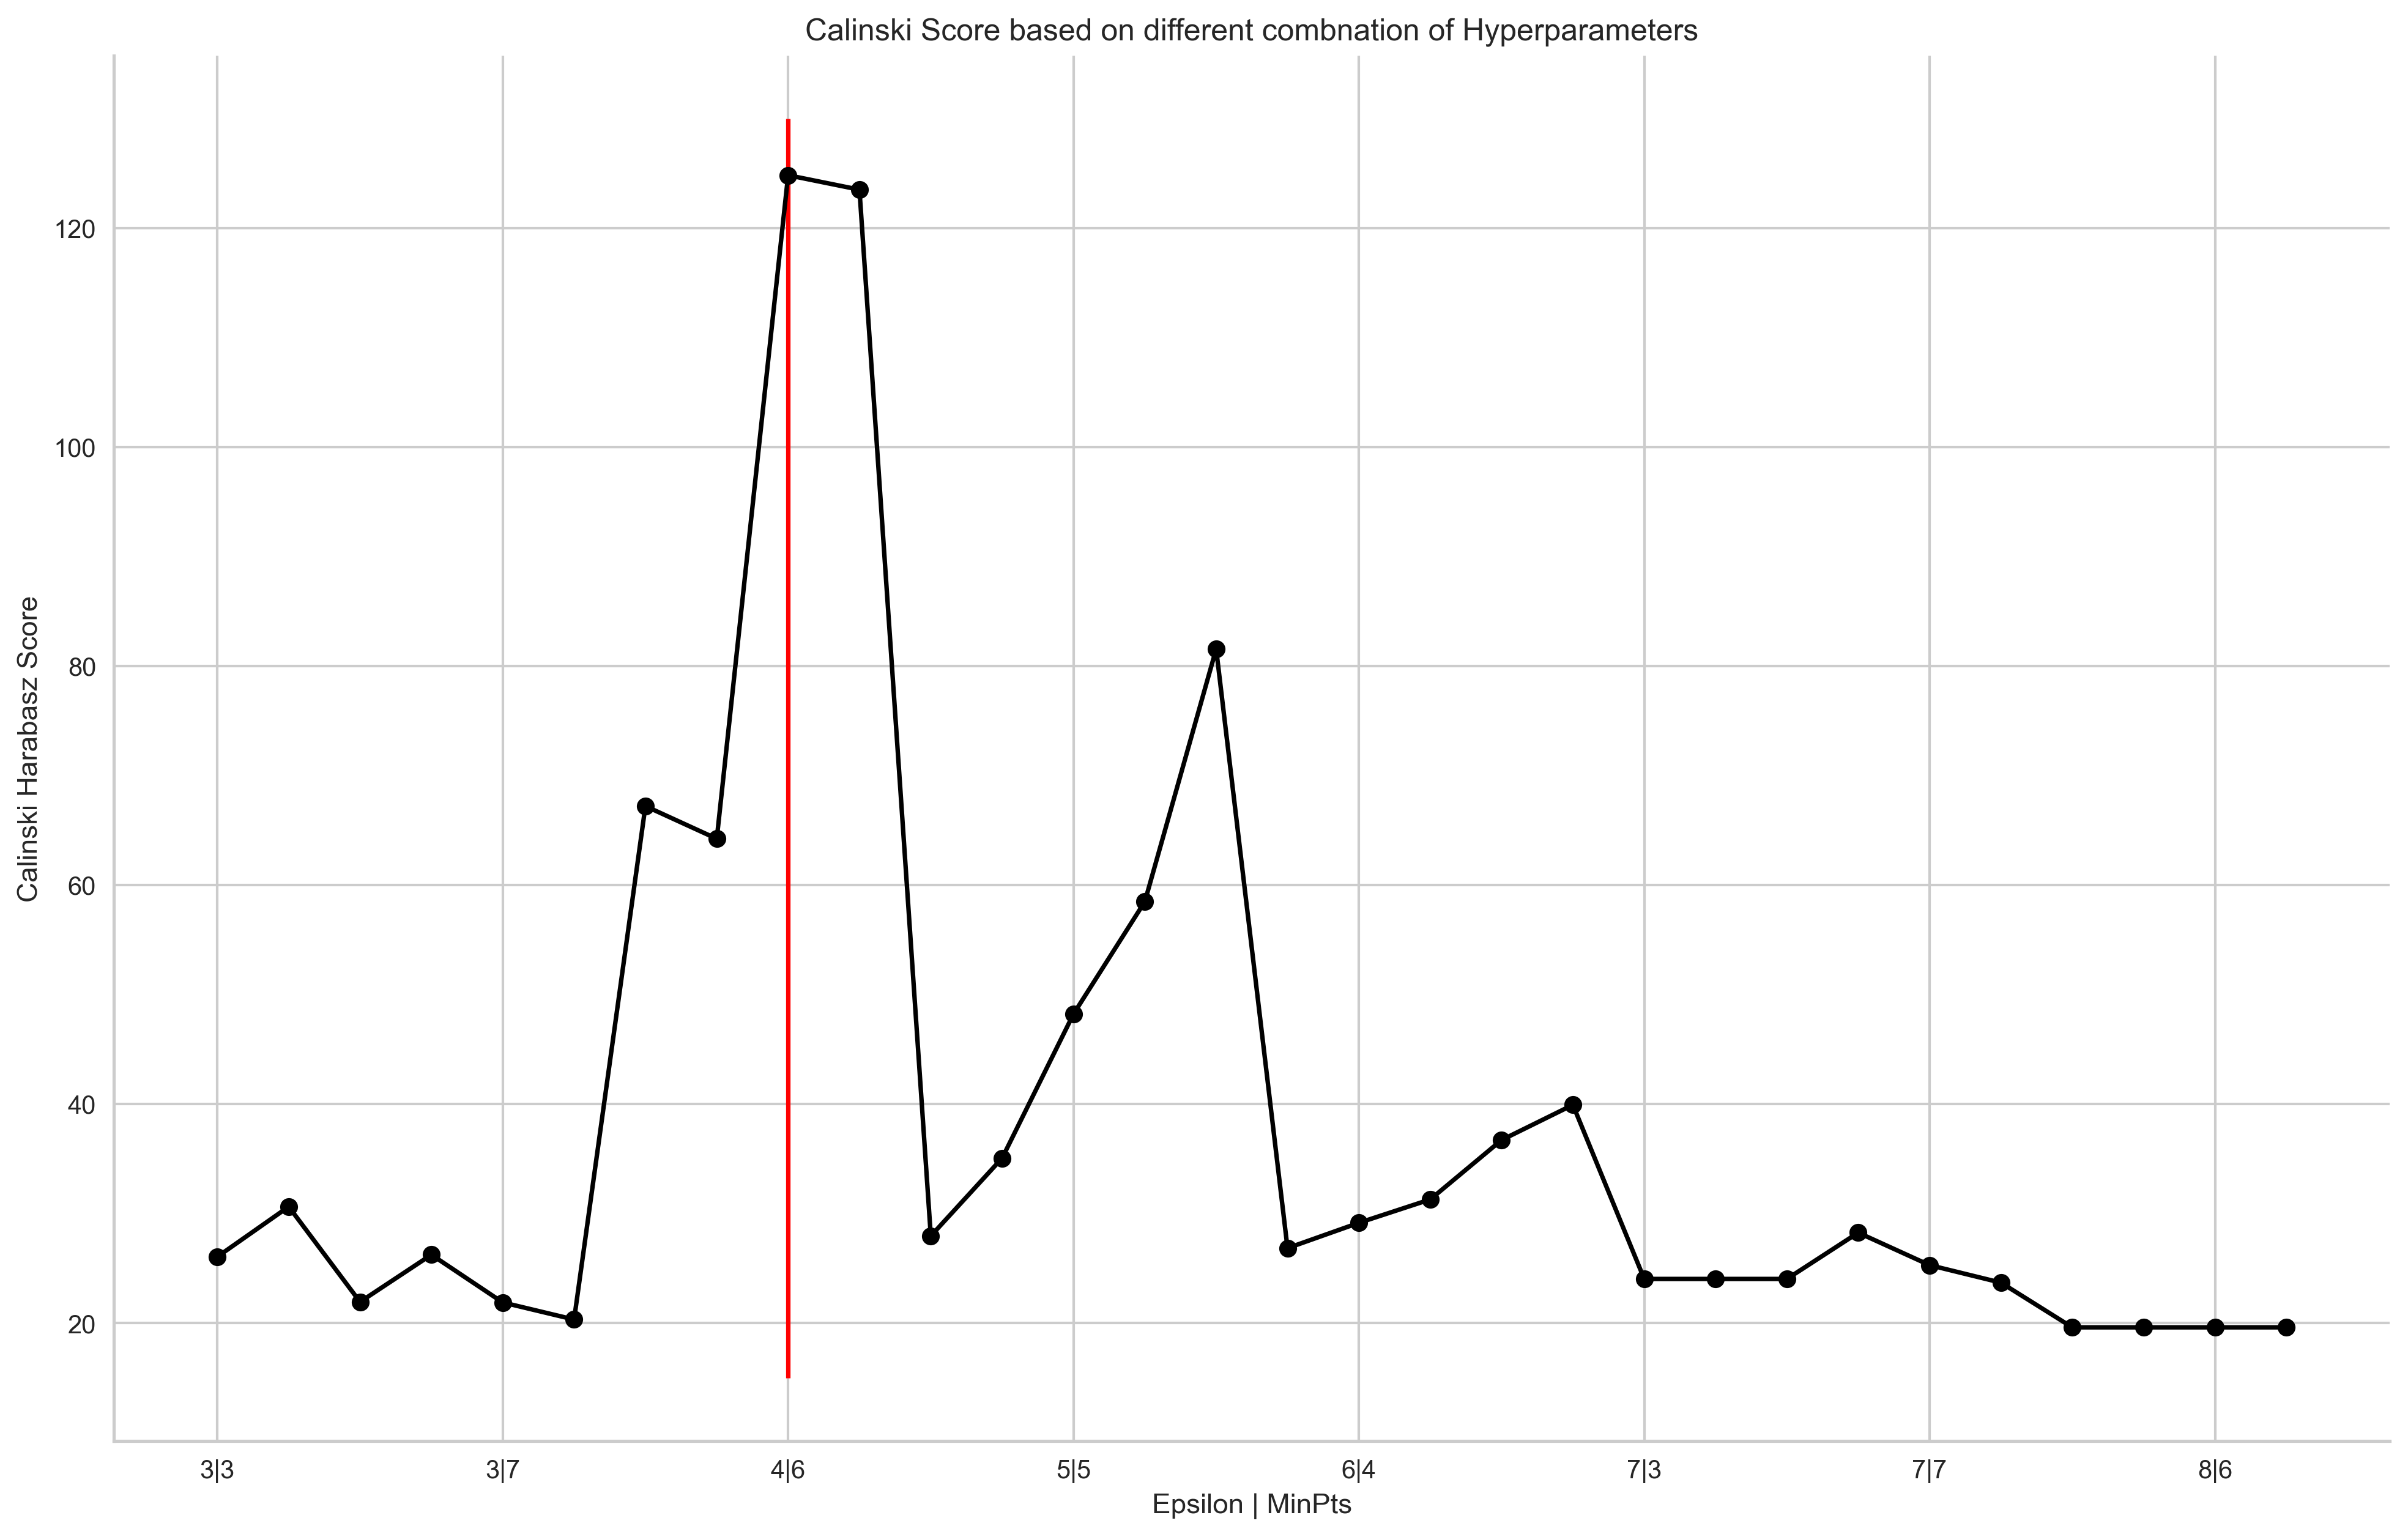

<Figure size 576x396 with 0 Axes>

In [86]:
fig = plt.figure(figsize=(16,10), dpi=300)
ax = plt.subplot(1, 1, 1)
plt.plot(comb, H, 'bo-', color='black')
from matplotlib.ticker import MaxNLocator

ax.xaxis.set_major_locator(MaxNLocator(10))

plt.xlabel('Epsilon | MinPts')
plt.ylabel('Calinski Harabasz Score')
plt.vlines(x=8, ymin=15, ymax=130, color='red')
plt.title('Calinski Score based on different combnation of Hyperparameters')
plt.show()
plt.tight_layout()

In [87]:
# Based on the plots above, we will go with maximum Calinski score where epsilon is 4 and minimum points being 6 

In [88]:
# First model: eps=4, MinPts=6
model46 = DBSCAN(eps=4, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=6, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm46 = model46.fit(PCA_df_gb)

# Print DBSCAN results
print('*************** DBSCAN Clustering Model ***************')
print("Cluster labels for the first model")
print(np.unique(clm46.labels_))

*************** DBSCAN Clustering Model ***************
Cluster labels for the first model
[-1  0]


In [89]:
# First model: eps=8, MinPts=3
model83 = DBSCAN(eps=8, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=3, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm83 = model83.fit(PCA_df_gb)

# Print DBSCAN results
print('*************** DBSCAN Clustering Model ***************')
print("Cluster labels for the first model")
print(np.unique(clm83.labels_))

*************** DBSCAN Clustering Model ***************
Cluster labels for the first model
[-1  0]


In [90]:
# First model: eps=4, MinPts=3
model43 = DBSCAN(eps=4, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=3, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm43 = model43.fit(PCA_df_gb)

# Print DBSCAN results
print('*************** DBSCAN Clustering Model ***************')
print("Cluster labels for the first model")
print(np.unique(clm43.labels_))

*************** DBSCAN Clustering Model ***************
Cluster labels for the first model
[-1  0  1  2  3  4  5  6  7  8  9]


All these metric scores for db clustering suggests that the best clustering is only two clusters - could mean either conservative or labour. Using the values for davies bouldin where there is a sudden decrease in the value, we try 4 | 3 and obtain 11 clusters (-1 being outliers). We will go with model 83

In [91]:
preds = model83.fit_predict(PCA_df_gb)

db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(preds)

In [92]:
gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,-1,0
seat_types_yg,,
con lab marginal,1,146
con ld marginal,0,22
con pc marginal,0,1
con safe,0,259
con snp marginal,0,20
green safe,0,1
lab ld marginal,0,1
lab safe,0,135
lab snp marginal,0,10


In [93]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

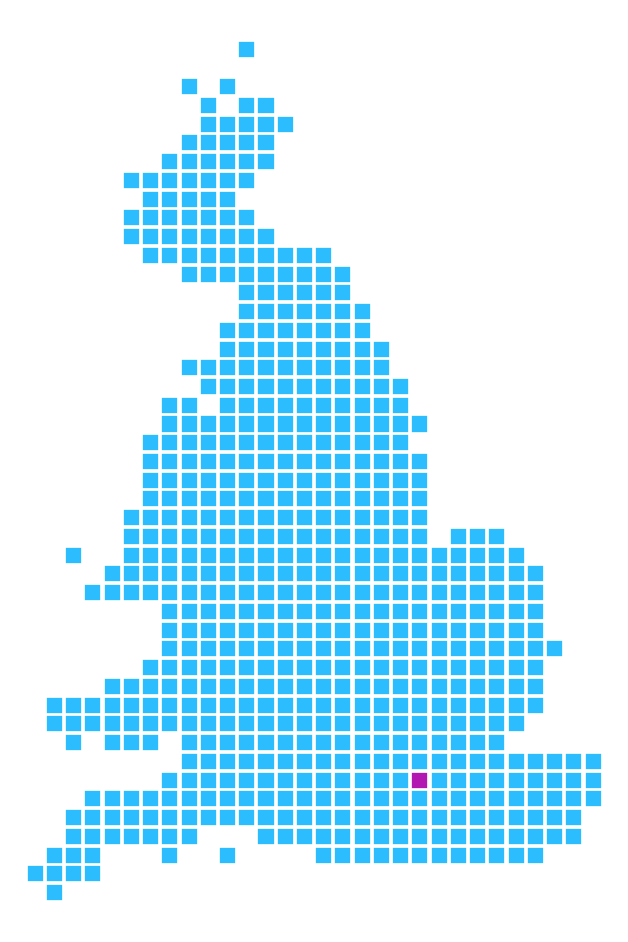

In [94]:
kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

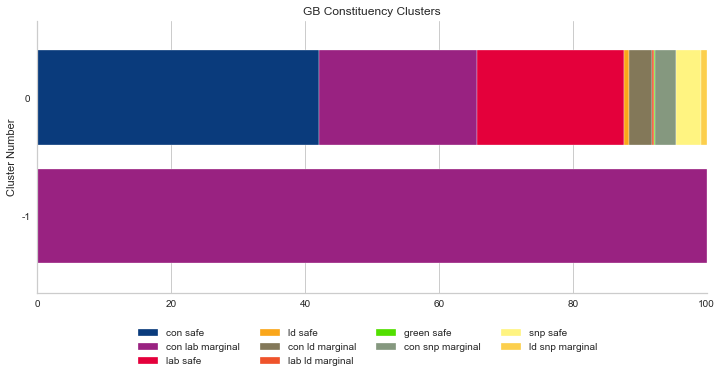

In [95]:
party_list = ['con safe','con lab marginal',
              'lab safe','ld safe',
              'con ld marginal','lab ld marginal',
              'green safe', 'con snp marginal', 'snp safe', 'ld snp marginal']

party_colors = [con_blue, con_lab, lab_red, lib_yel,
               con_lib, lab_lib, green_green, con_snp, snp_yel, lib_snp]

gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

Use this later as an insight as how the london constituency is a cluster of its own

https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80

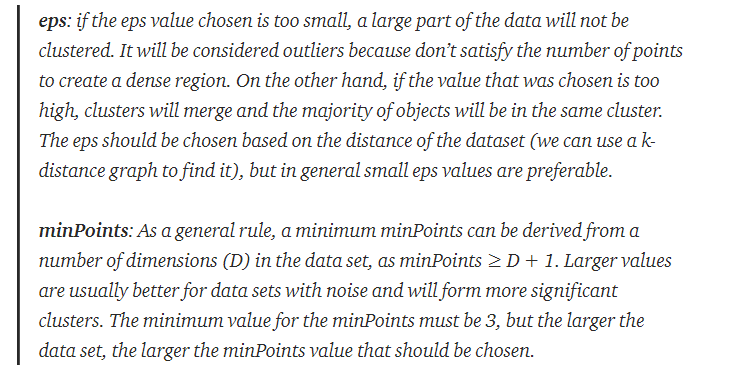

In [96]:
# Finding other methods to select optimal values for epsilon and minimum points

In [97]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [99]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(PCA_df_gb)
distances, indices = nbrs.kneighbors(PCA_df_gb)

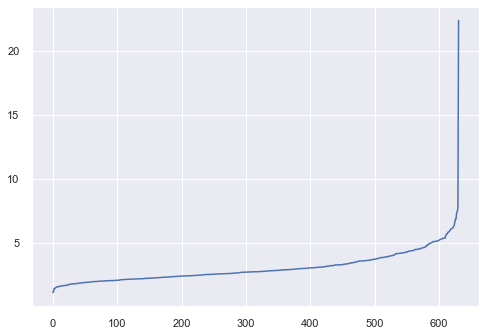

In [100]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
# We will choose 5 as our epsilon value, we will try 3, 5 and 6 with the minimum number of sample points and the most clusters 
# would be a solution to analyze further

In [102]:
# First model: eps=4, MinPts=3
model53 = DBSCAN(eps=5, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=3, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm53 = model53.fit(PCA_df_gb)
print(np.unique(clm53.labels_))

[-1  0  1  2]


In [103]:
# First model: eps=4, MinPts=3
model55 = DBSCAN(eps=5, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=5, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm55 = model55.fit(PCA_df_gb)
print(np.unique(clm55.labels_))

[-1  0  1]


In [122]:
# First model: eps=4, MinPts=3
model56 = DBSCAN(eps=5, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=6, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm56 = model56.fit(PCA_df_gb)
print(np.unique(clm56.labels_))

[-1  0]


We will go with model 56 and 53

In [105]:
# Model 55
preds = model53.fit_predict(PCA_df_gb)

db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(preds)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,-1,0,1,2
seat_types_yg,,,,
con lab marginal,5,142,0,0
con ld marginal,0,22,0,0
con pc marginal,0,1,0,0
con safe,5,254,0,0
con snp marginal,2,18,0,0
green safe,1,0,0,0
lab ld marginal,0,1,0,0
lab safe,33,94,5,3
lab snp marginal,0,10,0,0


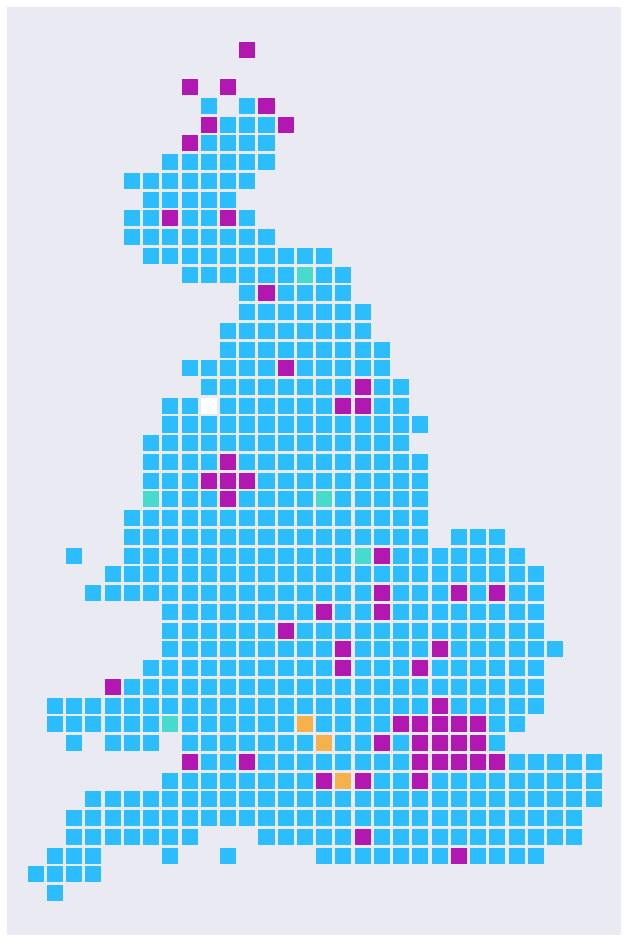

In [106]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

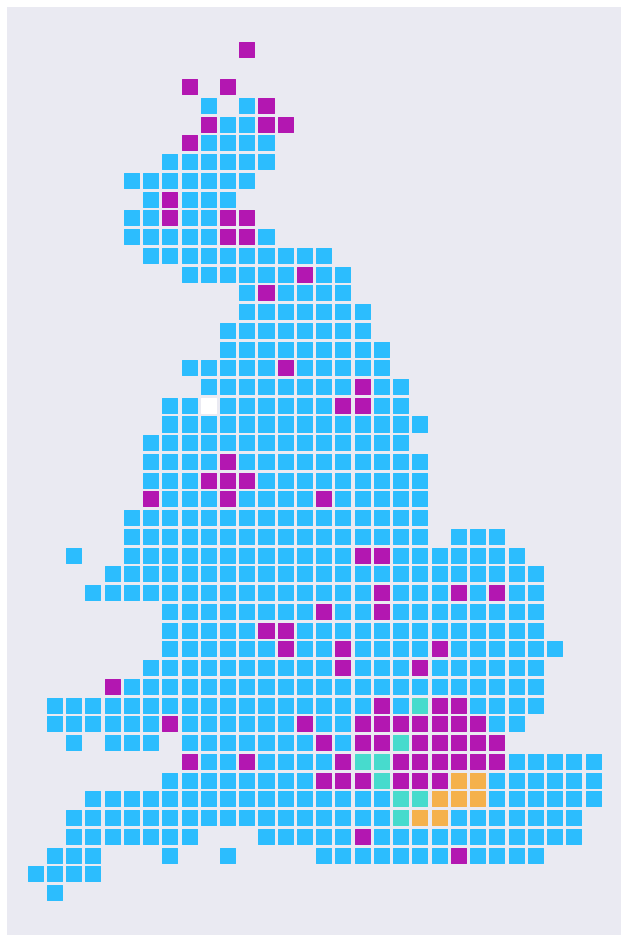

In [107]:
# Model 56
preds = model56.fit_predict(PCA_df_gb)

db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(preds)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

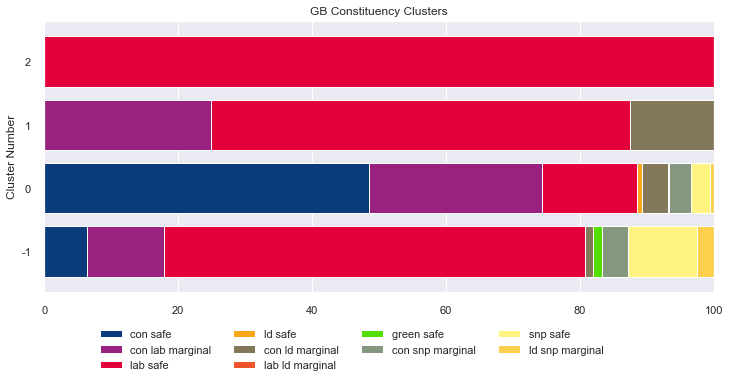

In [109]:
party_list = ['con safe','con lab marginal',
              'lab safe','ld safe',
              'con ld marginal','lab ld marginal',
              'green safe', 'con snp marginal', 'snp safe', 'ld snp marginal']

party_colors = [con_blue, con_lab, lab_red, lib_yel,
               con_lib, lab_lib, green_green, con_snp, snp_yel, lib_snp]

gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

Compared to the polls of 2019, the clustering suggests that labour should have won but it did not so DB clustering may not be very reliable

In [108]:
# Model 56 seems to cluster cities into further clusters and perform better clustering for example the green clusters seem 
# to be more centered rather than randomly spaced out over the UK as can be seen in model 53

6.439683430645208


<Figure size 360x360 with 0 Axes>

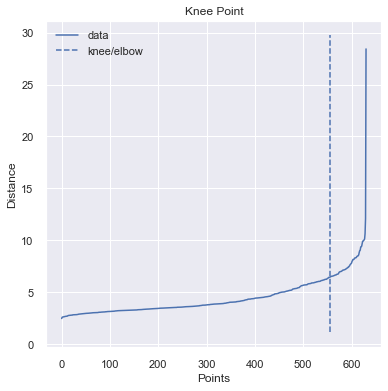

In [111]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(PCA_df_gb)
distances, indices = neighbors.kneighbors(PCA_df_gb)
distances = np.sort(distances[:,10], axis=0)

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Optimal number of min_samples based on silhouette score: [3]


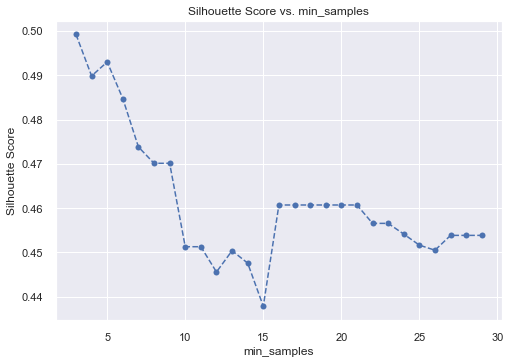

In [119]:
# Silhouette Score for DBSCAN

from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):
    '''
    
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Silhouette Score for DBSCAN
    '''
    #instantiate kmeans
    dbscan = DBSCAN(eps= 6.439683430645208, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(data)
    
    # Calculate Silhoutte Score

    score = silhouette_score(data, model.labels_, metric='euclidean')
    
    return score

scores = []
centers = list(range(3,30))

for center in centers:
    scores.append(get_dbscan_score(PCA_df_gb, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_samples based on silhouette score:', df4['min_samples'].tolist())

Optimal number of min_sample based on Calinski Harabasz score: [27, 28, 29]


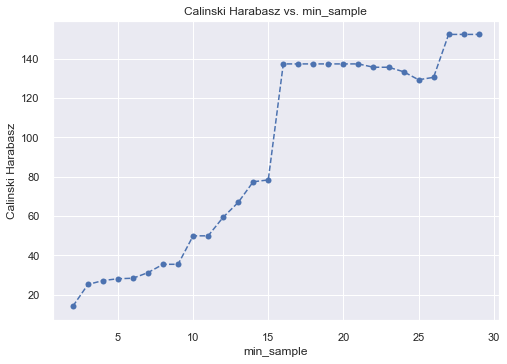

In [120]:
# Calinski Harabasz for DBSCAN

from sklearn.metrics import calinski_harabasz_score  

def get_dbscan_score(data, center):
    '''
    
    INPUT:
        data - the dataset you want to fit dbscan to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Calinski Harabasz score for the dbscan model fit to the data
    '''
    #instantiate dbscan
    dbscan = DBSCAN(eps=6.439683430645208, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(data)
    
    # Calculate Silhoutte Score

    score = calinski_harabasz_score(data, dbscan.labels_)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(PCA_df_gb, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_sample');
plt.ylabel('Calinski Harabasz');
plt.title('Calinski Harabasz vs. min_sample');

df3 = pd.DataFrame(centers,columns=['min_sample'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_sample based on Calinski Harabasz score:', df4['min_sample'].tolist())

Optimal number of min_samples based on DB score: [16, 17, 18, 19, 20, 21]


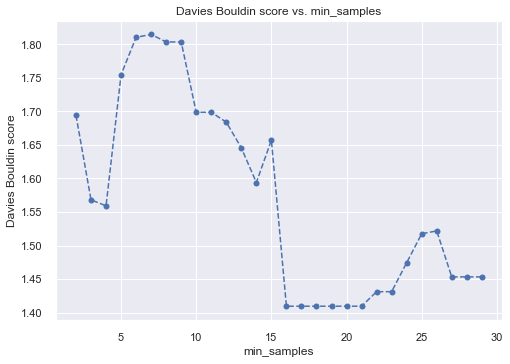

In [121]:
# Davies Bouldin score for DBSCAN

from sklearn.metrics import davies_bouldin_score 

def get_dbscan_score(data, center):
    '''
    returns the dbscan score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit dbscan to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the dbscan model fit to the data
    '''
    #instantiate dbscan
    dbscan = DBSCAN(eps=6.439683430645208, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit_predict(data)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(PCA_df_gb, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. min_samples');


df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of min_samples based on DB score:', df4['min_samples'].tolist())

In [ ]:
# A good set of hyperparameters would be 6.439683430645208 and 3, 16 and both give only 2 clusters

### Gaussian Mixture Modelling - Soft Clustering

### Using Bayesian information criterion score for Gaussian Mixture Modelling 

In [123]:
# BIC for GMM

from sklearn.mixture import GaussianMixture
n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        gmm.fit(PCA_df_gb)
        score.append((cov,n_comp,gmm.bic(PCA_df_gb)))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','BIC_Score']
score_2 = score_1[score_1.BIC_Score == score_1.BIC_Score.min()]

score_2.head(n=2)

,Covariance_Type,N_Components,BIC_Score
89,full,3,38610.107693


In [135]:
# Calinski Harabasz Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_c = calinski_harabasz_score(PCA_df_gb, model_2)
        score.append((cov,n_comp,score_c))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Calinski_Harabasz_Score']
score_2 = score_1[score_1.Calinski_Harabasz_Score == score_1.Calinski_Harabasz_Score.max()]
score_2.head(n=5)

,Covariance_Type,N_Components,Calinski_Harabasz_Score
28,tied,2,188.661839


In [124]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components= 3,covariance_type= "full", random_state = 10)
# fit the model
model.fit(PCA_df_gb)
# assign a cluster to each example
yhat = model.predict(PCA_df_gb)
# retrieve unique clusters
clusters = unique(yhat)

In [125]:
db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(yhat)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2
seat_types_yg,,,
con lab marginal,55,13,79
con ld marginal,9,4,9
con pc marginal,1,0,0
con safe,173,2,84
con snp marginal,19,0,1
green safe,0,0,1
lab ld marginal,0,0,1
lab safe,22,38,75
lab snp marginal,9,0,1


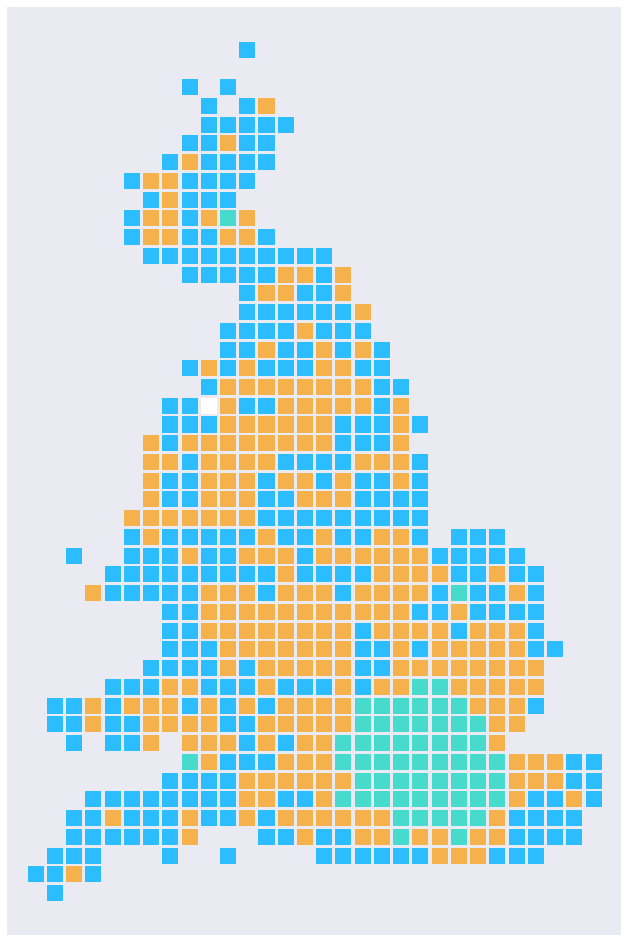

In [126]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

In [131]:
# Davies Bouldin Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_d = davies_bouldin_score(PCA_df_gb, model_2)
        score.append((cov,n_comp,score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Davies_Bouldin_Score']
score_2 = score_1[score_1.Davies_Bouldin_Score == score_1.Davies_Bouldin_Score.max()]
score_2.head(n=2)

,Covariance_Type,N_Components,Davies_Bouldin_Score
57,diag,3,3.300302


In [132]:
# Silhouette Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov,random_state = 10)
        model = gmm.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_s = silhouette_score(PCA_df_gb, model_2, metric='euclidean')
        score.append((cov,n_comp,score_s))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]
score_2.head(n=2)

,Covariance_Type,N_Components,Silhouette_Score
28,tied,2,0.443108


In [133]:
# define the model
model = GaussianMixture(n_components= 3,covariance_type= "diag", random_state = 10) # davies bouldin
# fit the model
model.fit(PCA_df_gb)
# assign a cluster to each example
yhat = model.predict(PCA_df_gb)
# retrieve unique clusters
clusters = unique(yhat)


db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(yhat)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2
seat_types_yg,,,
con lab marginal,102,4,41
con ld marginal,11,2,9
con pc marginal,0,0,1
con safe,217,4,38
con snp marginal,0,1,19
green safe,0,0,1
lab ld marginal,0,0,1
lab safe,38,25,72
lab snp marginal,0,0,10


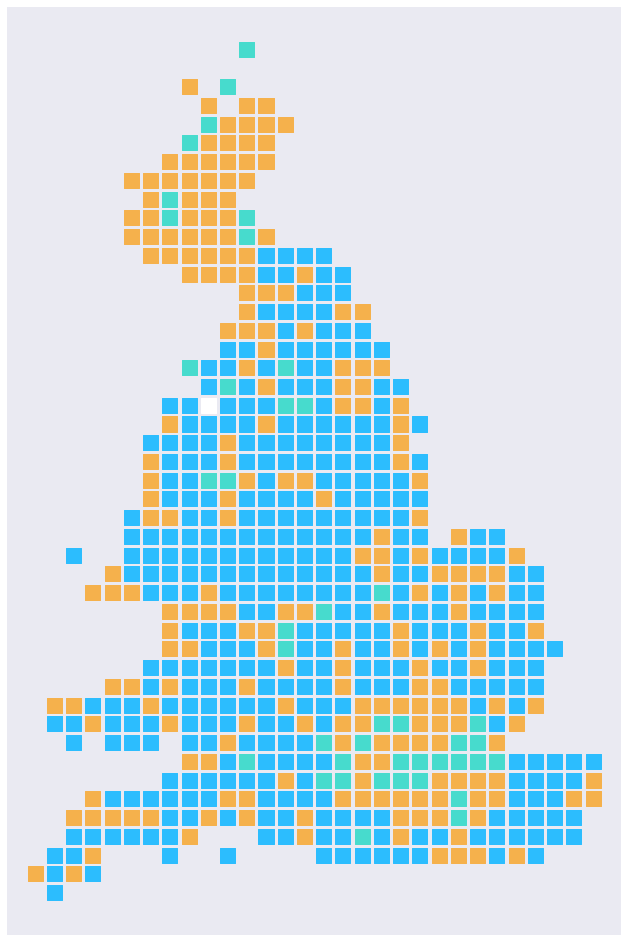

In [134]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

### Mean Shift Clustering

In [136]:
from sklearn.cluster import MeanShift

In [154]:
# Calinski Harabasz Score for Mean Shift


bandwidths = range(2, 11)
score=[]
for b in bandwidths:
        ms = MeanShift(bandwidth=b)
        model = ms.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_d = calinski_harabasz_score(PCA_df_gb, model_2)
        score.append((b, score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Bandwiths', 'Calinski_Harabasz_Score']
score_2 = score_1[score_1.Calinski_Harabasz_Score == score_1.Calinski_Harabasz_Score.max()]
score_2.head(n=2)

,Bandwiths,Calinski_Harabasz_Score
6,8,95.935964


In [155]:
# Silhouette Score for Mean Shift


bandwidths = range(2, 11)
score=[]
for b in bandwidths:
        ms = MeanShift(bandwidth=b)
        model = ms.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_d = silhouette_score(PCA_df_gb, model_2, metric='euclidean')
        score.append((b, score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Bandwiths', 'Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]
score_2.head(n=2)

,Bandwiths,Silhouette_Score
7,9,0.732961
8,10,0.732961


In [157]:
# Davies Bouldin Score for Mean Shift


bandwidths = range(2, 11)
score=[]
for b in bandwidths:
        ms = MeanShift(bandwidth=b)
        model = ms.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_d = davies_bouldin_score(PCA_df_gb, model_2)
        score.append((b, score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Bandwiths', 'Davies_Bouldin_Score']
score_2 = score_1[score_1.Davies_Bouldin_Score == score_1.Davies_Bouldin_Score.min()]
score_2.head(n=2)

,Bandwiths,Davies_Bouldin_Score
7,9,0.18703
8,10,0.18703


In [159]:
ms = MeanShift(bandwidth=8)
ms.fit(PCA_df_gb)

yhat = ms.predict(PCA_df_gb)
# retrieve unique clusters
clusters = unique(yhat)


db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(yhat)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2
seat_types_yg,,,
con lab marginal,142,4,1
con ld marginal,19,3,0
con pc marginal,1,0,0
con safe,258,1,0
con snp marginal,20,0,0
green safe,1,0,0
lab ld marginal,1,0,0
lab safe,101,34,0
lab snp marginal,10,0,0


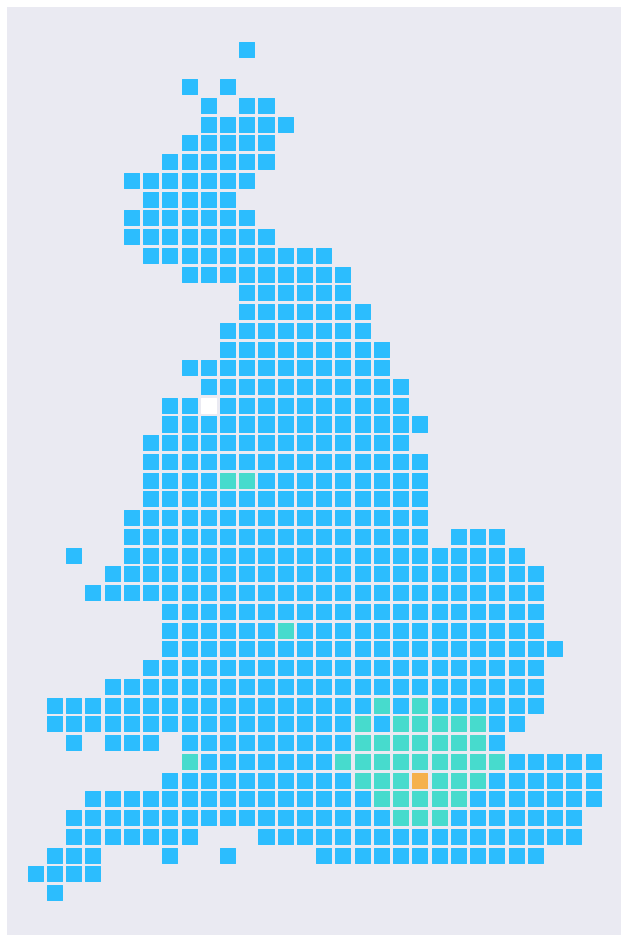

In [160]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

In [1]:
import umap

In [181]:
PCA_df_gb.to_csv('PCA_df_gb.csv')

In [4]:
import pandas as pd

In [9]:
PCA_df_gb = pd.read_csv('PCA_df_gb.csv', index_col='Unnamed: 0')

In [10]:
PCA_df_gb

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-4.105760,2.157808,2.413385,3.201811,-0.176227,-0.455692,1.543051,-0.468279,1.494805,0.725154,...,0.119468,-0.187851,0.184728,0.029203,-0.155382,0.014472,-0.068514,-0.533886,0.271799,-0.080296
1,-4.417949,-0.516706,1.136252,1.420812,-0.274972,0.450925,1.478088,0.839147,-0.319557,0.890047,...,-0.645545,0.852413,0.420811,0.207408,-0.329873,0.393681,0.186096,0.046542,-0.291699,0.000159
2,-3.802615,-0.264466,-0.561822,-0.319069,-0.211417,-0.476768,1.020079,0.347168,0.214542,0.783437,...,-0.583920,-0.392737,-0.439133,-0.042498,-0.232582,-0.321852,0.233282,-0.591523,0.614124,0.135139
3,-3.856275,-1.151724,-0.379109,-0.415298,-1.043781,-0.114177,0.856219,0.233318,1.367069,0.864213,...,-0.246515,-0.373854,0.035024,0.049572,0.007938,-0.047465,0.158289,-0.090380,0.486807,-0.234750
4,-0.968130,0.367183,4.441230,-3.060122,2.430671,-0.313711,0.509418,-0.510124,-0.195292,2.920729,...,-0.359156,0.229050,-0.098615,1.675880,0.065908,0.964765,0.658326,-0.463301,0.117723,-0.549443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,-3.042096,-1.082190,0.167774,-1.082534,-1.440194,-0.452734,-1.071862,-0.086947,-0.572529,0.649799,...,0.367733,-0.152269,-0.144366,0.000887,-0.320397,0.914763,0.153680,0.614769,-0.103512,-1.078509
627,-3.505358,-1.455676,-0.068903,-0.467287,-1.568310,-0.216879,-1.424247,0.370495,-0.938781,1.433518,...,0.164759,0.047345,1.714649,0.897927,-0.458524,0.267194,-0.980164,0.119532,0.456404,-1.116409
628,-2.234406,0.852460,0.268679,-1.191113,-0.187892,-0.881473,-0.067864,-0.533854,1.111914,0.595159,...,0.671613,0.134502,-0.650745,-0.406881,-0.231675,0.068179,0.249061,0.215713,0.207138,-0.284900
629,1.092082,-0.112853,1.102008,-1.966704,-0.637810,-1.768401,0.330358,0.968041,0.095667,-0.391952,...,0.541626,-0.496843,-0.326164,-0.214886,-0.456628,0.938572,0.440658,-0.808271,0.289420,-0.416609


### UMAP

In [97]:
umap_c = umap.UMAP(n_components=3, n_neighbors=20, metric='euclidean' , init='random', random_state=0)
gb = umap_c.fit_transform(PCA_df_gb)
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
yhat = kmeans.fit_predict(gb)

In [98]:
# retrieve unique clusters
clusters = np.unique(yhat)


db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(yhat)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5
seat_types_yg,,,,,,
con lab marginal,56,22,16,36,17,0
con ld marginal,0,8,7,0,7,0
con pc marginal,0,0,1,0,0,0
con safe,39,115,87,7,11,0
con snp marginal,1,1,12,0,0,6
green safe,0,0,0,1,0,0
lab ld marginal,0,1,0,0,0,0
lab safe,35,1,0,56,43,0
lab snp marginal,0,0,0,0,0,10


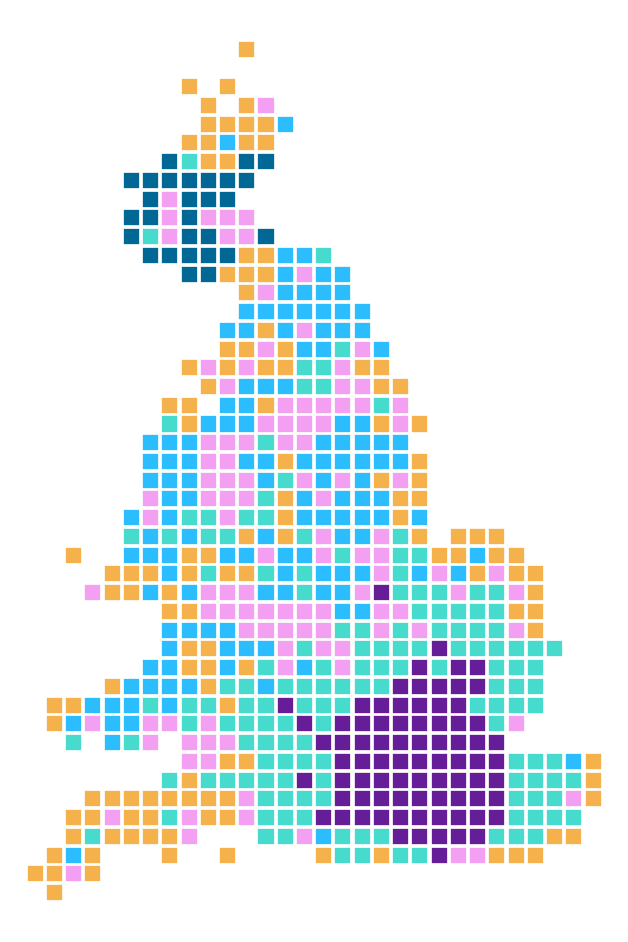

In [99]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)